In [1]:
import pandas as pd
import numpy as np

In [2]:
import re

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scrapy

In [5]:
# Settings for notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Show Python version
import platform
platform.python_version()

'3.6.12'

In [6]:
from scrapy.crawler import CrawlerProcess

In [7]:
import json

class JsonWriterPipeline(object):

    def open_spider(self, spider):
        self.file = open('quoteresult.jl', 'w')

    def close_spider(self, spider):
        self.file.close()

    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        return item

# moje przymiarki



In [8]:
import logging

class gratka_spider(scrapy.Spider):
    name = "moj_crawler"
    
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'ITEM_PIPELINES': {'__main__.JsonWriterPipeline': 1}, # Used for pipeline 1
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'quoteresult.json'                        # Used for pipeline 2
    } 
    
    def start_requests( self ):
        
            url = 'https://gratka.pl/nieruchomosci/mieszkania/warszawa?page='
            #yield scrapy.Request( url = url, callback = self.parse_front )
           
            for i in range(1, 312):
                yield scrapy.Request(url+str(i),callback=self.parse_front)
        
        
       
    def parse_front( self, response ):
        #course_blocks = response.css( 'div.course-block' )
        #course_links = course_blocks.xpath( './a/@href' )
        links_to_follow = response.css('a.teaserEstate__anchor::attr(href)').extract()
        for url in links_to_follow:
            yield response.follow( url = url,callback = self.parse_pages )
    
#         NEXT_PAGE_SELECTOR ='a.pagination__nextPage::attr(href)' 
#         next_page = response.css(NEXT_PAGE_SELECTOR).extract_first()
#         if next_page:
#             yield scrapy.Request(
#             response.urljoin(next_page),
#             callback=self.parse)      
    
    def parse_pages( self, response ):
          yield {
                'numer_ogloszenia':response.css('span[class=""]::text').extract_first().strip(),
                'tytul': response.css('h1.sticker__title::text').extract_first().strip(),
                'cena': response.css('span.priceInfo__value::text').extract_first().strip(),
                'cena_za_metr': response.css('span.priceInfo__additional::text').extract_first().strip(),
                'lokalizacja':response.css('.parameters__locationLink::text').extract(),
                'atrybuty' : response.xpath('//li/span[not(@*)]/text()')[1:].extract(),  
                'wartosci': response.xpath('//li/b/text()')[3:].extract() 
                #'tags': quote.css('div.tags a.tag::text').extract(),
            }
            
if __name__ == '__main__':
    process = CrawlerProcess({
        'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'})
    process.crawl(gratka_spider)
    process.start() 



   

2020-10-18 16:15:53 [scrapy.utils.log] INFO: Scrapy 1.5.0 started (bot: scrapybot)
2020-10-18 16:15:53 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2020-10-18 16:15:53 [scrapy.crawler] INFO: Overridden settings: {'FEED_FORMAT': 'json', 'FEED_URI': 'quoteresult.json', 'LOG_LEVEL': 30, 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}


2020-10-18 16:17:19 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-wola-ul-obozowa/ob/18417735> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=1)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-8-0d31689b409b>",

2020-10-18 16:27:22 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-wola-ul-obozowa/ob/18417619> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=143)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-8-0d31689b409b>

2020-10-18 16:30:29 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-mokotow/ob/18418919> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=146)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-8-0d31689b409b>", line 

2020-10-18 16:35:55 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-ul-lopuszanska-53/ob/18317713> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=223)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-8-0d31689b409

2020-10-18 16:40:17 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/mieszkanie-warszawa-ursus-ul-karola-adamieckiego/ob/17908597> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=277)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-8-0d316

2020-10-18 16:40:36 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-ursus/ob/17909409> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=272)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-8-0d31689b409b>", line 42

In [9]:
#trzeba odpalic anaconda prompt, przejsc do folderu C:\Anaconda3\Scripts czyli tam gdzie jesgt scrapy exe i mozna dzialac

In [10]:
# fetch('https://gratka.pl/nieruchomosci/mieszkania/warszawa')
# fetch('https://gratka.pl/nieruchomosci/mieszkanie-2-pokojowe-ulica-bukowinska-12/oi/17764407')

In [11]:
dfjson = pd.read_json('quoteresult.json')
dfjson

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
0,18341609,Wyjątkowy apartament z tarasem i pięknym widokiem,2 850 000,"15 745,86 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok ...","[ , 181 m, 4, 2, 2002, 2, 202..."
1,18537045,29m2 | Solec | Łazienki Królewskie 900m | Wido...,450 000,"15 469,23 zł/m","[Warszawa, Śródmieście, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 29,09 m, 1, 5, spółdzielc..."
2,18521281,"Racławicka, 4-pokoje, 113m2",1 350 000,"11 946,90 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 113 m, 4, 4, własność, do..."
3,18332131,KOMFORTOWY APARTAMENT NA SPRZEDAŻ WILANÓW SARM...,1 800 000,"11 729,44 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok ...","[ , 153,46 m, 4, 3, 2008, 4, ..."
4,18331409,Przy Pałacu z ogódkiem Cisza Spokój,2 800 000,"13 725,49 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok ...","[ , 204 m, 4, parter, 2009, 2..."
...,...,...,...,...,...,...,...
8729,18246239,"Mieszkanie Warszawa Mokotów, ul. Wita Stwosza",560 000,"12 727,27 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 44 m, 2, 5, własność, 197..."
8730,18246229,"Mieszkanie Warszawa Mokotów, ul. Marsylska",370 000,"11 935,48 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 31 m, 1, 5, spółdzielcze ..."
8731,18247227,"Mieszkanie Warszawa Wola, ul. Marcina Kasprzaka",309 000,"14 714,29 zł/m","[Warszawa, Wola, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 21 m, 1, 10, własność, 20..."
8732,18247225,"Mieszkanie Warszawa Mokotów, ul. Obrzeżna",915 000,"14 096,44 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 64,91 m, 2, parter, własn..."


In [12]:
pd.options.display.max_colwidth = 10000

In [13]:
#ponizej jest rozwiazanie problemu zbierania pustych

In [14]:

dfjson[dfjson['numer_ogloszenia']==17459207]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
490,17459207,"Mieszkanie Warszawa Mokotów, ul. Karola Chodkiewicza",2 147 630,"15 181,89 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[ , 141,46 m, 5, 4, własność, 2005, apartamentowiec, cegła, 7, w garażu, w aneksie, gratka-18202/3685/OMS]"


In [15]:
dfjson[dfjson['numer_ogloszenia']==17990059]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci


In [16]:
#tutaj totalnye work space
dfjson.wartosci[2]

['                  ',
 '113 m',
 '4',
 '4',
 'własność',
 'do remontu',
 '1979',
 'blok',
 'cegła',
 '6',
 '1',
 'tak',
 'gratka-815/6110/OMS']

In [17]:
proba=[]
for el in dfjson.wartosci:
    proba.append([name for name in el if name.strip()])

In [18]:
dfjson.wartosci=proba

In [19]:
# fetch('https://gratka.pl/nieruchomosci/mieszkanie-bemowo-46-m-czerwonych-makow-bezposrednio-meble-i-sprzet-kuchenny-w-cenie/oi/10945461')

In [20]:

new=dfjson[dfjson['numer_ogloszenia']==17459207]

In [21]:
new

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
490,17459207,"Mieszkanie Warszawa Mokotów, ul. Karola Chodkiewicza",2 147 630,"15 181,89 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[141,46 m, 5, 4, własność, 2005, apartamentowiec, cegła, 7, w garażu, w aneksie, gratka-18202/3685/OMS]"


# PONIZEJ LINK STACKOVERFLOW

In [22]:
#https://stackoverflow.com/questions/63289454/pandas-convert-list-of-list-to-columns-names-and-append-values/63289635#63289635

In [23]:
df=dfjson.copy()

In [24]:
df

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
0,18341609,Wyjątkowy apartament z tarasem i pięknym widokiem,2 850 000,"15 745,86 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Dostępność od, Numer referencyjny]","[181 m, 4, 2, 2002, 2, 2020-05-25, gratka-340882324]"
1,18537045,29m2 | Solec | Łazienki Królewskie 900m | Widok na,450 000,"15 469,23 zł/m","[Warszawa, Śródmieście, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[29,09 m, 1, 5, spółdzielcze własnościowe z KW, wysoki standard, 1969, blok, płyta, 10, 1, tak, gratka-309/9140/OMS]"
2,18521281,"Racławicka, 4-pokoje, 113m2",1 350 000,"11 946,90 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[113 m, 4, 4, własność, do remontu, 1979, blok, cegła, 6, 1, tak, gratka-815/6110/OMS]"
3,18332131,KOMFORTOWY APARTAMENT NA SPRZEDAŻ WILANÓW SARMACKA,1 800 000,"11 729,44 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Dostępność od, Numer referencyjny]","[153,46 m, 4, 3, 2008, 4, 2020-01-15, gratka-469389]"
4,18331409,Przy Pałacu z ogódkiem Cisza Spokój,2 800 000,"13 725,49 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[204 m, 4, parter, 2009, 2, gratka-610569777]"
...,...,...,...,...,...,...,...
8729,18246239,"Mieszkanie Warszawa Mokotów, ul. Wita Stwosza",560 000,"12 727,27 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[44 m, 2, 5, własność, 1978, 15, w garażu, w aneksie, gratka-19384/6624/OMS]"
8730,18246229,"Mieszkanie Warszawa Mokotów, ul. Marsylska",370 000,"11 935,48 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Liczba pięter w budynku, Forma kuchni, Numer referencyjny]","[31 m, 1, 5, spółdzielcze własnościowe, 1979, 10, oddzielna, gratka-19379/6624/OMS]"
8731,18247227,"Mieszkanie Warszawa Wola, ul. Marcina Kasprzaka",309 000,"14 714,29 zł/m","[Warszawa, Wola, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[21 m, 1, 10, własność, 2017, apartamentowiec, 11, w garażu, w aneksie, gratka-19396/6624/OMS]"
8732,18247225,"Mieszkanie Warszawa Mokotów, ul. Obrzeżna",915 000,"14 096,44 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Okna, Numer referencyjny]","[64,91 m, 2, parter, własność, 2009, apartamentowiec, 10, w garażu, w aneksie, drewniane, gratka-19395/6624/OMS]"


# testowe

In [25]:
def unnesting(df, explode, axis):
    if axis==1:
        idx = df.index.repeat(df[explode[0]].str.len())
        df1 = pd.concat([
            pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
        df1.index = idx

        return df1.join(df.drop(explode, 1), how='left')
    else :
        df1 = pd.concat([
                         pd.DataFrame(df[x].tolist(), index=df.index).add_prefix(x) for x in explode], axis=1)
        return df1.join(df.drop(explode, 1), how='left')

In [26]:
test=unnesting(dfjson, ['atrybuty','wartosci'], axis=0)

In [27]:
test.columns

Index(['atrybuty0', 'atrybuty1', 'atrybuty2', 'atrybuty3', 'atrybuty4',
       'atrybuty5', 'atrybuty6', 'atrybuty7', 'atrybuty8', 'atrybuty9',
       'atrybuty10', 'atrybuty11', 'atrybuty12', 'atrybuty13', 'atrybuty14',
       'atrybuty15', 'atrybuty16', 'atrybuty17', 'atrybuty18', 'atrybuty19',
       'atrybuty20', 'atrybuty21', 'atrybuty22', 'atrybuty23', 'atrybuty24',
       'wartosci0', 'wartosci1', 'wartosci2', 'wartosci3', 'wartosci4',
       'wartosci5', 'wartosci6', 'wartosci7', 'wartosci8', 'wartosci9',
       'wartosci10', 'wartosci11', 'wartosci12', 'wartosci13', 'wartosci14',
       'wartosci15', 'wartosci16', 'wartosci17', 'wartosci18', 'wartosci19',
       'wartosci20', 'wartosci21', 'wartosci22', 'numer_ogloszenia', 'tytul',
       'cena', 'cena_za_metr', 'lokalizacja'],
      dtype='object')

In [28]:
#tutaj byloby dobrze to zautomatyzowac

In [29]:
atrybuty_lista=['atrybuty0', 'atrybuty1', 'atrybuty2', 'atrybuty3', 'atrybuty4',
       'atrybuty5', 'atrybuty6', 'atrybuty7', 'atrybuty8', 'atrybuty9',
       'atrybuty10', 'atrybuty11', 'atrybuty12', 'atrybuty13', 'atrybuty14',
       'atrybuty15', 'atrybuty16', 'atrybuty17', 'atrybuty18', 'atrybuty19',
       'atrybuty20', 'atrybuty21', 'atrybuty22', 'atrybuty23', 'atrybuty24']
wartosci_lista=['wartosci0', 'wartosci1', 'wartosci2', 'wartosci3', 'wartosci4',
       'wartosci5', 'wartosci6', 'wartosci7', 'wartosci8', 'wartosci9',
       'wartosci10', 'wartosci11', 'wartosci12', 'wartosci13', 'wartosci14',
       'wartosci15', 'wartosci16', 'wartosci17', 'wartosci18', 'wartosci19',
       'wartosci20', 'wartosci21', 'wartosci22', 'wartosci23', 'wartosci24']

In [30]:
test_2=test.fillna('')

In [31]:
test_2.atrybuty0.unique()

array(['Powierzchnia w m2', 'Opłaty (czynsz administracyjny, media)'],
      dtype=object)

# tutaj stworzenie listy z poleczeniami 

In [32]:
w=[]
for i in range(0,21):
    w.append(test_2[('atrybuty')+str(i)]+' '+test_2[('wartosci')+str(i)])

In [33]:
pods=pd.DataFrame(w[0]+' '+w[1]+' '+w[2]+' '+w[3]+' '+w[4]+' '+w[5]+' '+w[6]+' '+w[7]+' '+w[8]+' '+w[9]+' '+w[10]+' '+w[11]+' '+w[12]+' '+w[13]+' '+w[14]+' '+w[15]+' '+w[16]+' '+w[17]+' '+w[18]+' '+w[19]+' '+w[20])#+' '+w[21])#+' '+w[22]+' '+w[23]+' '+w[24])

In [34]:
df['opis']=pods

In [35]:
w[2]

0            Piętro 2
1            Piętro 5
2            Piętro 4
3            Piętro 3
4       Piętro parter
            ...      
8729         Piętro 5
8730         Piętro 5
8731        Piętro 10
8732    Piętro parter
8733         Piętro 1
Length: 8734, dtype: object

In [36]:
w[2]

for words in w[2]:
    print(re.findall(r"Piętro+\s\d",  words))

0            Piętro 2
1            Piętro 5
2            Piętro 4
3            Piętro 3
4       Piętro parter
            ...      
8729         Piętro 5
8730         Piętro 5
8731        Piętro 10
8732    Piętro parter
8733         Piętro 1
Length: 8734, dtype: object

['Piętro 2']
['Piętro 5']
['Piętro 4']
['Piętro 3']
[]
['Piętro 7']
['Piętro 3']
['Piętro 6']
['Piętro 2']
['Piętro 1']
['Piętro 1']
['Piętro 3']
['Piętro 8']
['Piętro 3']
['Piętro 4']
['Piętro 3']
['Piętro 1']
[]
['Piętro 3']
['Piętro 3']
['Piętro 9']
['Piętro 3']
['Piętro 4']
['Piętro 4']
['Piętro 3']
['Piętro 2']
['Piętro 1']
['Piętro 3']
['Piętro 2']
[]
['Piętro 2']
['Piętro 3']
[]
[]
['Piętro 5']
['Piętro 1']
['Piętro 9']
['Piętro 5']
['Piętro 3']
[]
['Piętro 3']
['Piętro 1']
['Piętro 8']
['Piętro 1']
['Piętro 3']
[]
['Piętro 2']
['Piętro 3']
['Piętro 2']
[]
['Piętro 4']
[]
['Piętro 2']
['Piętro 5']
[]
['Piętro 5']
['Piętro 9']
[]
['Piętro 1']
[]
[]
['Piętro 2']
['Piętro 1']
['Piętro 1']
['Piętro 5']
['Piętro 2']
[]
['Piętro 2']
[]
[]
['Piętro 3']
[]
['Piętro 9']
['Piętro 4']
['Piętro 3']
[]
[]
['Piętro 2']
['Piętro 1']
['Piętro 2']
[]
['Piętro 4']
['Piętro 5']
['Piętro 5']
['Piętro 1']
['Piętro 4']
['Piętro 2']
['Piętro 3']
['Piętro 2']
['Piętro 4']
['Piętro 3']
['Piętro 2']
['Pi

[]
['Piętro 6']
['Piętro 2']
[]
[]
[]
[]
['Piętro 2']
['Piętro 2']
[]
[]
['Piętro 3']
[]
[]
['Piętro 1']
['Piętro 2']
[]
['Piętro 8']
['Piętro 5']
[]
[]
[]
[]
[]
[]
[]
[]
['Piętro 5']
['Piętro 2']
[]
['Piętro 1']
['Piętro 2']
[]
[]
[]
[]
['Piętro 7']
['Piętro 1']
[]
['Piętro 3']
[]
['Piętro 2']
[]
[]
['Piętro 2']
['Piętro 3']
['Piętro 2']
[]
[]
['Piętro 1']
['Piętro 1']
['Piętro 7']
[]
['Piętro 1']
['Piętro 8']
['Piętro 1']
['Piętro 2']
['Piętro 2']
['Piętro 3']
['Piętro 3']
['Piętro 1']
['Piętro 5']
['Piętro 2']
['Piętro 3']
['Piętro 2']
['Piętro 2']
['Piętro 6']
['Piętro 4']
[]
['Piętro 2']
['Piętro 9']
['Piętro 5']
['Piętro 1']
[]
['Piętro 2']
['Piętro 1']
['Piętro 3']
['Piętro 3']
['Piętro 8']
['Piętro 3']
[]
['Piętro 3']
[]
['Piętro 1']
[]
['Piętro 8']
['Piętro 5']
[]
['Piętro 7']
[]
[]
[]
['Piętro 6']
['Piętro 6']
['Piętro 4']
['Piętro 1']
['Piętro 2']
['Piętro 2']
['Piętro 3']
['Piętro 3']
['Piętro 2']
['Piętro 9']
['Piętro 3']
['Piętro 1']
['Piętro 4']
['Piętro 6']
['Piętro 4']

['Piętro 1']
[]
['Piętro 2']
['Piętro 2']
['Piętro 8']
['Piętro 3']
['Piętro 9']
['Piętro 8']
['Piętro 3']
['Piętro 2']
['Piętro 1']
['Piętro 2']
['Piętro 1']
['Piętro 1']
[]
['Piętro 1']
['Piętro 1']
['Piętro 1']
['Piętro 6']
['Piętro 5']
[]
[]
['Piętro 4']
['Piętro 6']
['Piętro 1']
['Piętro 9']
['Piętro 1']
['Piętro 4']
['Piętro 1']
['Piętro 1']
['Piętro 3']
['Piętro 1']
['Piętro 3']
['Piętro 1']
[]
['Piętro 3']
['Piętro 3']
['Piętro 1']
['Piętro 3']
['Piętro 1']
[]
[]
['Piętro 3']
['Piętro 5']
['Piętro 1']
['Piętro 3']
[]
[]
[]
['Piętro 1']
['Piętro 1']
[]
['Piętro 6']
['Piętro 1']
['Piętro 2']
['Piętro 1']
['Piętro 4']
['Piętro 2']
['Piętro 3']
['Piętro 3']
['Piętro 4']
['Piętro 4']
['Piętro 3']
[]
[]
['Piętro 8']
[]
['Piętro 3']
['Piętro 4']
['Piętro 9']
['Piętro 2']
['Piętro 4']
['Piętro 8']
['Piętro 7']
['Piętro 1']
['Piętro 1']
['Piętro 1']
[]
[]
['Piętro 9']
['Piętro 2']
['Piętro 2']
['Piętro 3']
['Piętro 1']
['Piętro 2']
[]
['Piętro 2']
['Piętro 4']
[]
[]
['Piętro 2']
['Piętr

['Piętro 3']
['Piętro 2']
[]
[]
['Piętro 7']
['Piętro 7']
['Piętro 3']
['Piętro 3']
[]
[]
[]
[]
['Piętro 5']
[]
[]
['Piętro 1']
['Piętro 7']
['Piętro 1']
['Piętro 1']
['Piętro 6']
['Piętro 4']
['Piętro 3']
['Piętro 1']
['Piętro 1']
['Piętro 3']
['Piętro 3']
['Piętro 4']
[]
['Piętro 1']
['Piętro 1']
['Piętro 1']
['Piętro 1']
['Piętro 1']
['Piętro 1']
['Piętro 3']
['Piętro 1']
[]
[]
['Piętro 3']
['Piętro 2']
['Piętro 5']
[]
['Piętro 3']
[]
[]
[]
['Piętro 4']
['Piętro 1']
[]
[]
['Piętro 5']
[]
[]
[]
[]
[]
[]
['Piętro 4']
['Piętro 2']
['Piętro 1']
['Piętro 1']
['Piętro 2']
['Piętro 1']
['Piętro 1']
['Piętro 1']
[]
[]
[]
['Piętro 1']
['Piętro 2']
['Piętro 8']
['Piętro 2']
[]
['Piętro 1']
['Piętro 3']
['Piętro 3']
['Piętro 1']
['Piętro 3']
['Piętro 9']
['Piętro 1']
['Piętro 1']
['Piętro 1']
['Piętro 2']
[]
['Piętro 2']
['Piętro 2']
[]
['Piętro 9']
[]
['Piętro 3']
['Piętro 9']
[]
[]
[]
['Piętro 1']
['Piętro 9']
['Piętro 4']
['Piętro 5']
['Piętro 3']
['Piętro 2']
[]
['Piętro 4']
[]
[]
[]
[]
[]

[]
['Piętro 9']
['Piętro 6']
['Piętro 1']
['Piętro 2']
['Piętro 2']
['Piętro 1']
['Piętro 5']
[]
['Piętro 7']
['Piętro 2']
[]
['Piętro 3']
['Piętro 1']
['Piętro 1']
['Piętro 9']
['Piętro 1']
['Piętro 1']
[]
['Piętro 3']
['Piętro 5']
['Piętro 4']
['Piętro 4']
['Piętro 1']
['Piętro 1']
['Piętro 5']
['Piętro 3']
['Piętro 3']
['Piętro 2']
[]
['Piętro 6']
['Piętro 4']
[]
['Piętro 1']
['Piętro 1']
['Piętro 2']
['Piętro 2']
['Piętro 4']
['Piętro 3']
['Piętro 3']
['Piętro 1']
['Piętro 8']
['Piętro 2']
['Piętro 4']
['Piętro 2']
['Piętro 2']
['Piętro 1']
[]
[]
['Piętro 6']
['Piętro 3']
['Piętro 1']
[]
['Piętro 3']
[]
['Piętro 1']
['Piętro 1']
[]
['Piętro 2']
[]
['Piętro 1']
['Piętro 6']
[]
['Piętro 1']
['Piętro 2']
['Piętro 4']
['Piętro 4']
['Piętro 8']
['Piętro 1']
['Piętro 6']
['Piętro 3']
['Piętro 2']
[]
['Piętro 2']
['Piętro 2']
['Piętro 5']
['Piętro 6']
['Piętro 2']
['Piętro 1']
[]
[]
[]
['Piętro 4']
['Piętro 1']
[]
['Piętro 2']
['Piętro 4']
['Piętro 5']
['Piętro 1']
[]
['Piętro 1']
['Piętr

['Piętro 4']
['Piętro 6']
['Piętro 6']
['Piętro 6']
['Piętro 5']
['Piętro 3']
['Piętro 5']
['Piętro 3']
['Piętro 4']
['Piętro 2']
[]
['Piętro 7']
['Piętro 6']
['Piętro 5']
['Piętro 2']
['Piętro 6']
['Piętro 5']
['Piętro 3']
['Piętro 2']
['Piętro 3']
['Piętro 1']
['Piętro 4']
['Piętro 4']
['Piętro 3']
['Piętro 3']
[]
['Piętro 2']
['Piętro 2']
['Piętro 2']
['Piętro 1']
['Piętro 2']
['Piętro 1']
['Piętro 7']
[]
['Piętro 6']
['Piętro 6']
['Piętro 3']
['Piętro 5']
['Piętro 6']
['Piętro 3']
['Piętro 5']
['Piętro 3']
['Piętro 5']
[]
[]
['Piętro 1']
['Piętro 9']
[]
['Piętro 1']
[]
['Piętro 9']
['Piętro 3']
['Piętro 1']
['Piętro 5']
[]
['Piętro 1']
['Piętro 1']
['Piętro 1']
['Piętro 2']
['Piętro 1']
['Piętro 2']
['Piętro 2']
['Piętro 1']
['Piętro 5']
['Piętro 4']
['Piętro 4']
['Piętro 9']
['Piętro 7']
['Piętro 5']
['Piętro 2']
['Piętro 3']
['Piętro 1']
['Piętro 4']
['Piętro 1']
['Piętro 2']
['Piętro 2']
['Piętro 1']
['Piętro 5']
['Piętro 2']
['Piętro 3']
['Piętro 1']
['Piętro 1']
['Piętro 9']
[

['Piętro 8']
[]
['Piętro 4']
[]
['Piętro 2']
['Piętro 3']
[]
[]
['Piętro 2']
[]
['Piętro 9']
[]
[]
[]
['Piętro 5']
[]
['Piętro 2']
[]
['Piętro 3']
['Piętro 5']
[]
[]
[]
[]
[]
['Piętro 9']
['Piętro 3']
[]
['Piętro 3']
[]
[]
[]
[]
[]
['Piętro 3']
['Piętro 4']
['Piętro 6']
['Piętro 3']
['Piętro 1']
['Piętro 1']
['Piętro 2']
['Piętro 1']
['Piętro 9']
['Piętro 2']
['Piętro 5']
['Piętro 1']
['Piętro 3']
[]
[]
[]
['Piętro 2']
['Piętro 5']
['Piętro 3']
[]
['Piętro 3']
['Piętro 3']
['Piętro 1']
['Piętro 4']
['Piętro 9']
[]
['Piętro 4']
['Piętro 2']
['Piętro 1']
[]
['Piętro 6']
['Piętro 2']
['Piętro 1']
['Piętro 3']
['Piętro 3']
['Piętro 1']
[]
['Piętro 9']
['Piętro 6']
[]
['Piętro 4']
['Piętro 1']
[]
[]
['Piętro 4']
[]
[]
[]
[]
[]
[]
[]
['Piętro 1']
['Piętro 1']
['Piętro 4']
[]
['Piętro 6']
[]
['Piętro 4']
[]
['Piętro 6']
[]
['Piętro 1']
[]
['Piętro 1']
['Piętro 4']
[]
[]
['Piętro 1']
['Piętro 5']
[]
[]
['Piętro 1']
['Piętro 1']
['Piętro 5']
['Piętro 2']
['Piętro 4']
[]
[]
['Piętro 1']
[]
['Pię

In [37]:
#uunikalne własności atrybutów
#for el in 
for el in test_2.iloc[:,0:25]:
    print(test_2[el].unique())

['Powierzchnia w m2' 'Opłaty (czynsz administracyjny, media)']
['Liczba pokoi' 'Powierzchnia w m2' 'Piętro' 'Forma własności'
 'Numer referencyjny' 'Materiał budynku']
['Piętro' 'Liczba pokoi' 'Forma własności' 'Stan'
 'Liczba pięter w budynku' 'Numer referencyjny' 'Rok budowy'
 'Typ zabudowy' 'Forma kuchni' '']
['Rok budowy' 'Forma własności' 'Typ zabudowy' 'Stan' 'Piętro'
 'Liczba pięter w budynku' 'Numer referencyjny' 'Materiał budynku'
 'Dostępność od' '' 'Forma kuchni']
['Liczba pięter w budynku' 'Stan' 'Rok budowy' 'Typ zabudowy'
 'Materiał budynku' 'Forma własności' 'Miejsce parkingowe' 'Forma kuchni'
 'Numer referencyjny' 'Dostępność od' '' 'Czy mieszkanie ma łazienkę?'
 'Liczba miejsc parkingowych' 'Nazwa inwestycji' 'Stan instalacji']
['Dostępność od' 'Rok budowy' 'Numer referencyjny' 'Typ zabudowy'
 'Liczba pięter w budynku' 'Materiał budynku' 'Stan' 'Forma kuchni'
 'Czy mieszkanie ma łazienkę?' '' 'Miejsce parkingowe'
 'Liczba miejsc parkingowych' 'Stan instalacji' 'Okna'
 

In [38]:
#pietro
pietro=[]
for words in df['opis']:
    pietro.append(re.findall(r"Piętro+\s\d",  words))

In [39]:
df['pietro'] =pietro
df['pietro'] =df['pietro'].explode()

In [40]:
# pd.show_versions()

In [41]:
df['pietro'].replace('Piętro+\s','',regex=True,inplace=True)
df['pietro']

0         2
1         5
2         4
3         3
4       NaN
       ... 
8729      5
8730      5
8731      1
8732    NaN
8733      1
Name: pietro, Length: 8734, dtype: object

In [42]:
#Powierzchnia w m2
powierzchnia=[]
for words in df['opis']:
    powierzchnia.append(re.findall(r"Powierzchnia\sw\sm2+\s\d+",  words))

In [43]:
df['powierzchnia'] =powierzchnia
df['powierzchnia'] =df['powierzchnia'].explode()

In [44]:
df['powierzchnia'].replace('Powierzchnia\sw\sm2+\s','',regex=True,inplace=True)

In [45]:
#Liczba pokoi
pokoje=[]
for words in df['opis']:
    pokoje.append(re.findall(r"Liczba\spokoi\s\d+",  words))
    
   

In [46]:
df['pokoje'] =pokoje
df['pokoje'] =df['pokoje'].explode()

In [47]:
df['pokoje'].replace('Liczba\spokoi','',regex=True,inplace=True)

In [48]:
df['pokoje']

0        4
1        1
2        4
3        4
4        4
        ..
8729     2
8730     1
8731     1
8732     2
8733     2
Name: pokoje, Length: 8734, dtype: object

In [49]:
#Opłaty (czynsz administracyjny, media),

oplaty=[]
for words in df['opis']:
    oplaty.append(re.findall(r"Opłaty\s\Wczynsz\s\w+\W\s\w+\W\s[0-9 ]+",  words))
    
    
oplaty_czynsz = []
for sublist in oplaty:
    for item in sublist:
        oplaty_czynsz.append(item)

In [50]:
df['oplaty'] =oplaty
df['oplaty'] =df['oplaty'].explode()

In [51]:
df['oplaty'].replace('Opłaty\s\Wczynsz\s\w+\W\s\w+\W\s[0-9 ]+','',regex=True,inplace=True)

In [52]:
# TO JEST NIEKONIECZNE< ALE MOZE SIE PRZydAC

#df['oplaty'].fillna('N/A',inplace=True)

In [53]:
#Forma własności DO DOPRACOWANIA, bo tu replace do zrobienia
forma=[]
for words in df['opis']:
    forma.append(re.findall(r"Forma\swłasności+\s\w+",  words))



In [54]:
#Liczba pięter w budynku
pietra_w_bud=[]
for words in df['opis']:
    pietra_w_bud.append(re.findall(r"Liczba\spięter\sw\s\w+\s\d+",  words))
    
 

In [55]:
df['pietra_w_bud'] =pietra_w_bud
df['pietra_w_bud'] =df['pietra_w_bud'].explode()

In [56]:
df['pietra_w_bud'].replace('Liczba\spięter\sw\s\w+\s','',regex=True,inplace=True)

In [57]:
typ_zab=[]


#'Typ zabudowy' 
for words in df['opis']:
    typ_zab.append(re.findall(r"Typ\s\w+\s\w+",  words))   



In [58]:
df['typ_zab'] =typ_zab
df['typ_zab'] =df['typ_zab'].explode()

In [59]:
df['typ_zab'].replace('Typ\s\w+\s','',regex=True,inplace=True)

# Stan - In progress

In [60]:
Stan_test=[]  
for words in df['opis']:
    Stan_test.append(re.findall(r"Stan\s\w+\s\w+",  words))   



In [61]:
Stan_test

[[],
 ['Stan wysoki standard'],
 ['Stan do remontu'],
 [],
 [],
 ['Stan wysoki standard'],
 ['Stan do remontu'],
 ['Stan do remontu'],
 ['Stan dobry Rok'],
 [],
 ['Stan do remontu'],
 ['Stan dobry Rok'],
 ['Stan wysoki standard'],
 ['Stan dobry Rok'],
 ['Stan do odświeżenia'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Stan wysoki standard'],
 ['Stan wysoki standard'],
 ['Stan wysoki standard'],
 ['Stan wysoki standard'],
 [],
 ['Stan wysoki standard'],
 [],
 [],
 [],
 [],
 ['Stan wysoki standard'],
 [],
 [],
 ['Stan wysoki standard'],
 [],
 [],
 ['Stan wysoki standard'],
 ['Stan dobry Rok'],
 [],
 ['Stan dobry Rok'],
 [],
 ['Stan wysoki standard'],
 ['Stan wysoki standard'],
 [],
 [],
 [],
 ['Stan dobry Rok'],
 ['Stan dobry Rok'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Stan wysoki standard'],
 [],
 [],
 [],
 [],
 ['Stan do odświeżenia'],
 [],
 [],
 ['Stan wysoki standard'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Stan do remontu', 'Stan instalacji po', 'Stan łazienki do'],
 ['Stan wysoki standard'],
 [

In [62]:
#    'Rok budowy' 
rok_budowy=[]
for words in df['opis']:
    rok_budowy.append(re.findall(r"Rok\sbudowy\s\d+",  words))  
    




In [63]:
df['rok_budowy'] =rok_budowy
df['rok_budowy'] =df['rok_budowy'].explode()

In [64]:
df['rok_budowy'].replace('Rok\sbudowy\s','',regex=True,inplace=True)

In [65]:
#lekkie wątpliwości czy to tak

for words in df['opis']:
    print(re.findall(r"łazienkę\W+\s\w+",  words))

#      'Czy mieszkanie ma łazienkę?'
#          'Komunikacja'
#              'Materiał budynku' 
#                 'Miejsce parkingowe'
#                 'Forma kuchni'
#                 'Okna'
#                  'Stan instalacji'    

[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
['łazienkę? t

[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę

[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
['łazienkę? t

[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['łazienkę? tak']
[]
[]
[]
[]
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
['łazienkę? tak']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [66]:
#          'Komunikacja'

for words in df['opis']:
    print(re.findall(r"Komunikacja\s\w+",  words))



#              'Materiał budynku' 
#                 'Miejsce parkingowe'
#                 'Forma kuchni'
#                 'Okna'
#                  'Stan instalacji'    

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja przychodnia']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja autobus']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja autobus']
['Komunikacja autobus']
['Komunikacja autobus']
[]
[]
[]
[]
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja przychodnia']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja przychodnia']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja autobus']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja sklep']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
[]
[]
[]
['Komunikacja autobus']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
['Komunikacja apteka']
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
['Komunikacja apteka']
['Komunikacja autobus']
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

[]
[]
[]
['Komunikacja apteka']
['Komunikacja apteka']
['Komunikacja autobus']
['Komunikacja autobus']
[]
[]
[]
[]
[]
[]
[]
['Komunikacja autobus']
[]
['Komunikacja apteka']
[]
[]
[]
['Komunikacja autobus']
['Komunikacja autobus']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
['Komunikacja apteka']
['Komunikacja autobus']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
['Komunikacja apteka']
[]
['Komunikacja apteka']
[]
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja autobus']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja autobus']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja apteka']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Komunikacja autobus']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [67]:
#              'Materiał budynku' 
material=[]
for words in df['opis']:
    material.append(re.findall(r"Materiał\s\w+\s\w+",  words))




#                 'Miejsce parkingowe'
#                 'Forma kuchni'
#                 'Okna'
#                  'Stan instalacji'    

In [68]:
df['material'] =material
df['material'] =df['material'].explode()

In [69]:
df['material'].replace('Materiał\s\w+\s','',regex=True,inplace=True)

In [70]:
df['material']

0         NaN
1       płyta
2       cegła
3         NaN
4         NaN
        ...  
8729      NaN
8730      NaN
8731      NaN
8732      NaN
8733      NaN
Name: material, Length: 8734, dtype: object

In [71]:
# 'Miejsce parkingowe' - do poprawy, pewnie jakies replace trzeba dac

for words in df['opis']:
    print(re.findall(r"Miejsce\s\w+\s\w+\s\w+",  words))





#                 'Forma kuchni'
#                 'Okna'
#                  'Stan instalacji'  

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe przynależne na']
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe przynależne na']
[]
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
['Miejsce parkingowe przynależne na']
[]
[]
['Miejsce parkingowe brak miejsca']
[]
[]
['Miejsce parkingowe brak miejsca']
[]
['Miejsce parkingowe przynależne na']
[]
[]
[]
['Miejsce parkingowe brak miejsca']
[]
[]
['Miejsce parkingowe brak miejsca']
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parking

[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe przynależne na']
[]
[]
['Miejsce parkingowe przynależne na']
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe przynależne na']
[]
[]
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[

[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
['Miejsce parkingowe brak miejsca']
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe brak miejsca']
[]
['Miejsce parkingowe przynależne na']
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe brak miejsca']
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
['Miejsce parkingowe brak miejsca']
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkin

['Miejsce parkingowe w garażu']
['Miejsce parkingowe przynależne na']
[]
[]
[]
[]
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe przynależne na']
[]
[]
['Miejsce parkingowe przynależne na']
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
['Miejsc

['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe przynależne na']
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe przynależne na']
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe przynależne na']
[]
[]
['Miejsce parkingowe brak miejsca']
[]
[]
['Miejsce parkingowe brak miejsca']
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
['Miejsce parkingowe brak miejsca']
['Miejsce parkingowe w garażu']
[]
[]

[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe przynależne na']
[]
['Miejsce parkingowe przynależne na']
[]
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe w garażu']
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
['Miejsce parkingowe przynależne na']
[]
[]
['Miejsce parkingowe przynależne na']
[]
['Miejsce parkingowe przynależne na']
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe brak miejsca']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
['Miejsce park

[]
[]
['Miejsce parkingowe przynależne na']
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe brak miejsca']
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
[]
['Miejsce parkingowe brak miejsca']
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce p

[]
[]
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe brak miejsca']
['Miejsce parkingowe przynależne na']
['Miejsce parkingowe brak miejsca']
[]
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
[]
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
[]
['Miejsce parkingowe w garażu']
['Miejsce parkingowe w garażu']
[]


In [72]:
# 'Forma kuchni - do poprawienia, pewnie jakies replace czy cos

for words in df['opis']:
    print(re.findall(r"Forma\skuchni\s\w+\s\w+",  words))






#                 'Okna'
#                  'Stan instalacji'  

[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni oddzielna Czy']
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Czy']
[]
[]
[]
[]
['Forma kuchni oddzielna Czy']
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Numer']
['Forma kuchni oddzielna Czy']
[]
[]
[]
['Forma kuchni oddzielna Numer']
[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni oddzielna Czy']
[]
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni oddzielna Czy']
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Czy']
[]
['Forma kuchni oddzielna Czy']
['Forma kuchni oddzielna Czy']
['Forma kuchni oddzielna Czy']
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Stan']
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Czy']
[]
['Forma kuchni oddzielna Czy']
[]
[]
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni oddzielna Czy']
['Fo

['Forma kuchni oddzielna Numer']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Okna']
[]
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
['Forma kuchni oddzielna Okna']
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Okna']
[]
['Forma kuchni oddzielna Numer']
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni oddzielna Czy']
['Forma kuchni oddzielna Czy']
[]
[]
[]
[]
['Forma kuchni oddzielna Czy']
[]
['Forma kuchni w aneksie']
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Okna']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Okna']
[]
['Forma kuchni oddzielna Okna']
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Okna']
['Forma kuchni oddzielna Stan']
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Okna']
[]
[]
['Forma kuchni w aneksie']
[

['Forma kuchni w aneksie']
['Forma kuchni oddzielna Numer']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni oddzielna Numer']
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Okna']
['Forma kuchni oddzielna Numer']
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni oddzielna Stan']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Okna']
['Forma kuchni oddzielna Stan']
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni oddzielna Numer']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Okna']
[]
['Forma kuchni oddzielna Stan']
[]
['Forma kuchni oddzielna Okna']
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Okna']
[]
[]
['Forma kuchni oddzielna Okna']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Okna']
[]
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni w aneksie']

[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni oddzielna Czy']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Okna']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni prześwit Głośność']
[]
[]
[]
[]
['Forma kuchni oddzielna Okna']
['Forma kuchni w aneksie']
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
[]
['Forma kuchni oddzielna Czy']
[]
[]
[]
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Czy']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Numer']
['Forma kuchni w aneksie']
[]
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Numer']
[

[]
['Forma kuchni oddzielna Czy']
[]
[]
[]
['Forma kuchni w aneksie']
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Numer']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Czy']
[]
[]
[]
['Forma kuchni prześwit Czy']
['Forma kuchni w aneksie']
['Forma kuchni prześwit Okna']
[]
[]
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni prześwit Czy']
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Dostępność']
['Forma 

[]
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Numer']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni oddzielna Głośność']
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Numer']
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni oddzielna Numer']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Dostępność']
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Numer']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Numer']
[]
[]
['Forma kuchni w aneksie']
[]
[]
['For

[]
[]
['Forma kuchni oddzielna Czy']
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
[]
['Forma kuchni oddzielna Czy']
[]
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Okna']
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Okna']
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
[]
[]
['Forma kuchni oddzielna Czy']
['Forma kuchni oddzielna Numer']
[]
[]
[]
[]
[]
['Forma kuchni oddzielna Numer']
[]
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Czy']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
['Forma kuchni oddzielna Czy']
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni oddzielna Czy']
[]
[]
['Forma kuchni w aneksie']
['Form

['Forma kuchni oddzielna Numer']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni oddzielna Numer']
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
[]
[]
['Forma kuchni oddzielna Czy']
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
[]
['Forma kuchni oddzielna Czy']
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni od

[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni oddzielna Głośność']
[]
[]
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
['Forma kuchni oddzielna Okna']
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
[]
[]
['Forma kuchni oddzielna Okna']
[]
['Forma kuchni oddzielna Numer']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
['Forma kuchni oddzielna Numer']
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Okna']
['Forma kuchni oddzielna Okna']
[]
[]
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
[]
[]
[]
[]
[]
[]
[]
['Forma kuchni w aneksie']
['Forma kuchni w aneksie']
[]
['Forma kuchni oddzielna Okna']
['Forma kuchni w aneksie']
[]
['Forma kuchni w aneksie']
[]
['Form

In [73]:
# 'Okna' - do poprawienia, pewnie jakies replace czy cos

for words in df['opis']:
    print(re.findall(r"Okna\s\w+",  words))







#                  'Stan instalacji'  

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
[]
['Okna plastikowe']
[]
[]
[]
[]
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
[]
['Okna plastikowe']
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
[]
['Okna drewniane']
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
['Okna plastikowe']
[]
[]
['Okna plastikowe']
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna drewniane']
[

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna drewniane']
['Okna plastikowe']
[]
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
[]
[]
['Okna plastikowe']
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna plastikowe']
[]
[]
[]
['Okna drewniane']
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
[]
['Okna plastikowe']
['Okna plastikowe']
[]
[]
['Okna plastikowe']
[]
['Okna plastikowe']
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna drewniane']
[]
[]
[]
[]
[]
[]
['Okna drewniane']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna drewniane']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna drewniane']
[]
[]
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna drewniane']
['Okna plastikowe']
['Okna plastikowe']
[]
[]
['Okna plastikowe']
[]
[]
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
[]
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna drewniane']
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna drewniane']
['Okna plastikowe']
['Okna plastikowe']
['Okna drewniane']
[]
[]
[]
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna drewniane']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
[

['Okna drewniane']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
[]
[]
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
[]
[]
[]
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
[]
[]
['Okna plastikowe']
[]
['Okna plastikowe']
[]
[]
['Okna plastikowe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Okna plastikowe']
['Okna drewniane']
[]
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna drewniane']
[]
['Okna plastikowe']
['Okna plastikowe']
[]
['Okna plastikowe']
['Okna plastikowe']
['Okna plastikowe'

In [74]:
# 'Stan instalacji'  - do poprawienia, pewnie jakies replace czy cos

for words in df['opis']:
    print(re.findall(r"Stan\sinstalacji\s\w+\s\w+",  words))
                

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji nowa Stan']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

['Stan instalacji nowa Forma']
['Stan instalacji po wymianie']
[]
['Stan instalacji po wymianie']
['Stan instalacji nowa Forma']
[]
[]
['Stan instalacji nowa Forma']
['Stan instalacji do wymiany']
[]
[]
[]
['Stan instalacji nowa Forma']
[]
['Stan instalacji nowa Forma']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji nowa Forma']
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
['Stan instalacji nowa Forma']
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
['Stan instalacji do wymiany']
[]
[]
['Stan instalacji nowa Forma']
[]
['Stan instalacji po wymianie']
[]
['Stan instalacji po wymianie']
[]
[]
['Stan instalacji nowa Stan']
[]
[]
['Stan ins

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
['Stan instalacji nowa Stan']
['Stan instalacji nowa Stan']
[]
[]
['Stan instalacji nowa Forma']
['Stan instalacji nowa Stan']
[]
[]
[]
['Stan instalacji nowa Stan']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji nowa Okna']
['Stan instalacji po wymianie']
[]
[]
['Stan instalacji nowa Okna']
[]
[]
[]
[]
[]
['Stan instalacji częś

['Stan instalacji nowa Stan']
['Stan instalacji po wymianie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
[]
['Stan instalacji nowa Forma']
['Stan instalacji po wymianie']
['Stan instalacji po wymianie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji nowa Okna']
['Stan instalacji nowa Okna']
[]
[]
['Stan instalacji nowa Forma']
['Stan instalacji po wymianie']
[]
[]
['Stan instalacji nowa Stan']
['Stan instalacji po wymianie']
[]
[]
[]
[]
['Stan instalacji po wymianie']
[]
['Stan instalacji po wymianie']
[]
[]
[]
[]
['Stan instalacji nowa Forma']
['Stan instalacji nowa Stan']
[]
[]
[]
[]
[]
['Stan instalacji częściowo wymieniona']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji nowa Forma']
[]
[]
['Stan instalacji nowa Stan']
['Stan instalacji czę

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
['Stan instalacji po wymianie']
['Stan instalacji po wymianie']
['Stan instalacji nowa Forma']
['Stan instalacji po wymianie']
['Stan instalacji nowa Forma']
['Stan instalacji nowa Stan']
[]
[]
['Stan instalacji po wymianie']
[]
['Stan instalacji po wymianie']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji nowa Forma']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji nowa Stan']
[]
['Stan instalacji nowa Stan']
['Stan instalacji nowa Stan']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
['Stan instalacji nowa Forma']
['Stan instalacji po wymianie']
[]
['Stan instalacji nowa Stan']
[]
[]
[]
['Stan instalacji nowa 

[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
[]
[]
['Stan instalacji po wymianie']
[]
[]
[]
['Stan instalacji po wymianie']
['Stan instalacji nowa Forma']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji częściowo wymieniona']
['Stan instalacji częściowo wymieniona']
[]
[]
[]
['Stan instalacji po wymianie']
[]
[]
[]
['Stan instalacji nowa Forma']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji nowa Forma']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
['Stan instalacji nowa Forma']
[]
['Stan instalacji nowa Forma']
['Stan instalacji po wymianie']
['Stan instalacji nowa Forma']
['Stan instalacji nowa Forma']
[]
[]
[]
['Stan instalacji nowa Głośność']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji nowa Forma']
[]
[]
['Stan instalacji nowa Stan']
['Stan instalacji nowa Stan']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Stan instalacji po wymianie']
['Stan instalacji nowa Forma']
['Stan instalacji nowa Forma']
['Stan instalacji po wymianie']
['Stan instalacji nowa Forma']
['Stan i

In [75]:
df.drop(df[~df['cena_za_metr'].str.contains(r"\d+\s\d+",regex=True)].index,inplace=True)#tutaj usuwam jakies bledne kwoty za mkw

In [76]:
df

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material
0,18341609,Wyjątkowy apartament z tarasem i pięknym widokiem,2 850 000,"15 745,86 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Dostępność od, Numer referencyjny]","[181 m, 4, 2, 2002, 2, 2020-05-25, gratka-340882324]",Powierzchnia w m2 181 m Liczba pokoi 4 Piętro 2 Rok budowy 2002 Liczba pięter w budynku 2 Dostępność od 2020-05-25 Numer referencyjny gratka-340882324,2,181,4,NaN,2,NaN,2002,NaN
1,18537045,29m2 | Solec | Łazienki Królewskie 900m | Widok na,450 000,"15 469,23 zł/m","[Warszawa, Śródmieście, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[29,09 m, 1, 5, spółdzielcze własnościowe z KW, wysoki standard, 1969, blok, płyta, 10, 1, tak, gratka-309/9140/OMS]","Powierzchnia w m2 29,09 m Liczba pokoi 1 Piętro 5 Forma własności spółdzielcze własnościowe z KW Stan wysoki standard Rok budowy 1969 Typ zabudowy blok Materiał budynku płyta Liczba pięter w budynku 10 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-309/9140/OMS",5,29,1,NaN,10,blok,1969,płyta
2,18521281,"Racławicka, 4-pokoje, 113m2",1 350 000,"11 946,90 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[113 m, 4, 4, własność, do remontu, 1979, blok, cegła, 6, 1, tak, gratka-815/6110/OMS]",Powierzchnia w m2 113 m Liczba pokoi 4 Piętro 4 Forma własności własność Stan do remontu Rok budowy 1979 Typ zabudowy blok Materiał budynku cegła Liczba pięter w budynku 6 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-815/6110/OMS,4,113,4,NaN,6,blok,1979,cegła
3,18332131,KOMFORTOWY APARTAMENT NA SPRZEDAŻ WILANÓW SARMACKA,1 800 000,"11 729,44 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Dostępność od, Numer referencyjny]","[153,46 m, 4, 3, 2008, 4, 2020-01-15, gratka-469389]","Powierzchnia w m2 153,46 m Liczba pokoi 4 Piętro 3 Rok budowy 2008 Liczba pięter w budynku 4 Dostępność od 2020-01-15 Numer referencyjny gratka-469389",3,153,4,NaN,4,NaN,2008,NaN
4,18331409,Przy Pałacu z ogódkiem Cisza Spokój,2 800 000,"13 725,49 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[204 m, 4, parter, 2009, 2, gratka-610569777]",Powierzchnia w m2 204 m Liczba pokoi 4 Piętro parter Rok budowy 2009 Liczba pięter w budynku 2 Numer referencyjny gratka-610569777,NaN,204,4,NaN,2,NaN,2009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,18246239,"Mieszkanie Warszawa Mokotów, ul. Wita Stwosza",560 000,"12 727,27 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[44 m, 2, 5, własność, 1978, 15, w garażu, w aneksie, gratka-19384/6624/OMS]",Powierzchnia w m2 44 m Liczba pokoi 2 Piętro 5 Forma własności własność Rok budowy 1978 Liczba pięter w budynku 15 Miejsce parkingowe w garażu Forma kuchni w aneksie Numer referencyjny gratka-19384/6624/OMS,5,44,2,NaN,15,NaN,1978,NaN
8730,18246229,"Mieszkanie Warszawa Mokotów, ul. Marsylska",370 000,"11 935,48 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Liczba pięter w budynku, Forma kuchni, Numer referencyjny]","[31 m, 1, 5, spółdzielcze własnościowe, 1979, 10, oddzielna, gratka-19379/662

In [77]:
#cena wraz z funkcja podloga, czyli  grosze ucinamy, bez zaokgraglen

cena_metr=[]

for words in df['cena_za_metr']:
    cena_metr.append(re.findall(r"\d+\s\d+",  words))
    
    
    
cena_metr_kw = []
for sublist in cena_metr:
    for item in sublist:
        cena_metr_kw.append(item)
    

In [78]:
#będzie trzeba wypierdolic wartosci skrajne typu cena < 50000

In [79]:
len(cena_metr_kw)

8730

In [80]:
df.shape

(8730, 16)

In [81]:
# for words in df['cena_za_metr']:
#     cena_metr.append(re.findall(r"\d+\s\d+",  words))

In [82]:
df['cena_metr_kw']=cena_metr_kw

In [83]:
df['cena_metr_kw'].replace(' ',"",inplace=True)

In [84]:
#df['cena_metr_kw'].str.trim()

In [85]:
#złaczenie stringow

In [86]:
cena_metr_kw=[]
for words in df['cena_metr_kw']:
    cena_metr_kw.append(re.sub(r"\s",'',  words))
    
# df['cena_metr_kw']=cena_metr_kw.astype(int)

In [87]:
df['cena_metr_kw']=cena_metr_kw

In [88]:
df['cena_metr_kw']=df['cena_metr_kw'].astype(int)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d372bf1d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1d372bf96d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d372bf1ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d372bf9f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d372c02400>],
 'means': []}

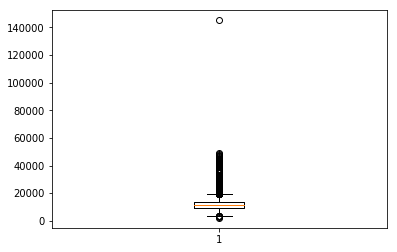

In [89]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.boxplot(df['cena_metr_kw'])

# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

In [90]:
df=df[(df['cena_metr_kw']<55000) & (df['cena_metr_kw']>4000)].copy()#usuwam skrajne wartosci gdy cena_mkw jest > niz 55000 i mniejsze niz 4000 za mkw

In [91]:
df[df['cena_metr_kw']<4000]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw


{'whiskers': [<matplotlib.lines.Line2D at 0x1d372c60ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d372c68588>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d372c60a58>],
 'medians': [<matplotlib.lines.Line2D at 0x1d372c68e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d372c712e8>],
 'means': []}

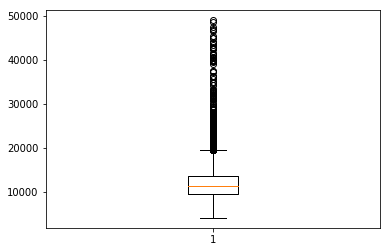

In [92]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.boxplot(df['cena_metr_kw'])

# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

In [93]:
df.lokalizacja.explode()

0          Warszawa
0           Wilanów
0       mazowieckie
1          Warszawa
1       Śródmieście
           ...     
8732        Mokotów
8732    mazowieckie
8733       Warszawa
8733         Bemowo
8733    mazowieckie
Name: lokalizacja, Length: 25787, dtype: object

In [94]:
df['cena_metr_kw'].mean()

12006.72829452919

In [95]:
df['cena_metr_kw'].min()

4045

In [96]:
df['cena_metr_kw'].max()

48999

In [97]:
df['cena_metr_kw'].median()

11265.0

In [98]:
test=unnesting(df, ['lokalizacja'], axis=0)

In [99]:
test

,lokalizacja0,lokalizacja1,lokalizacja2,numer_ogloszenia,tytul,cena,cena_za_metr,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
0,Warszawa,Wilanów,mazowieckie,18341609,Wyjątkowy apartament z tarasem i pięknym widokiem,2 850 000,"15 745,86 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Dostępność od, Numer referencyjny]","[181 m, 4, 2, 2002, 2, 2020-05-25, gratka-340882324]",Powierzchnia w m2 181 m Liczba pokoi 4 Piętro 2 Rok budowy 2002 Liczba pięter w budynku 2 Dostępność od 2020-05-25 Numer referencyjny gratka-340882324,2,181,4,NaN,2,NaN,2002,NaN,15745
1,Warszawa,Śródmieście,mazowieckie,18537045,29m2 | Solec | Łazienki Królewskie 900m | Widok na,450 000,"15 469,23 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[29,09 m, 1, 5, spółdzielcze własnościowe z KW, wysoki standard, 1969, blok, płyta, 10, 1, tak, gratka-309/9140/OMS]","Powierzchnia w m2 29,09 m Liczba pokoi 1 Piętro 5 Forma własności spółdzielcze własnościowe z KW Stan wysoki standard Rok budowy 1969 Typ zabudowy blok Materiał budynku płyta Liczba pięter w budynku 10 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-309/9140/OMS",5,29,1,NaN,10,blok,1969,płyta,15469
2,Warszawa,Mokotów,mazowieckie,18521281,"Racławicka, 4-pokoje, 113m2",1 350 000,"11 946,90 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[113 m, 4, 4, własność, do remontu, 1979, blok, cegła, 6, 1, tak, gratka-815/6110/OMS]",Powierzchnia w m2 113 m Liczba pokoi 4 Piętro 4 Forma własności własność Stan do remontu Rok budowy 1979 Typ zabudowy blok Materiał budynku cegła Liczba pięter w budynku 6 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-815/6110/OMS,4,113,4,NaN,6,blok,1979,cegła,11946
3,Warszawa,Wilanów,mazowieckie,18332131,KOMFORTOWY APARTAMENT NA SPRZEDAŻ WILANÓW SARMACKA,1 800 000,"11 729,44 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Dostępność od, Numer referencyjny]","[153,46 m, 4, 3, 2008, 4, 2020-01-15, gratka-469389]","Powierzchnia w m2 153,46 m Liczba pokoi 4 Piętro 3 Rok budowy 2008 Liczba pięter w budynku 4 Dostępność od 2020-01-15 Numer referencyjny gratka-469389",3,153,4,NaN,4,NaN,2008,NaN,11729
4,Warszawa,Wilanów,mazowieckie,18331409,Przy Pałacu z ogódkiem Cisza Spokój,2 800 000,"13 725,49 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[204 m, 4, parter, 2009, 2, gratka-610569777]",Powierzchnia w m2 204 m Liczba pokoi 4 Piętro parter Rok budowy 2009 Liczba pięter w budynku 2 Numer referencyjny gratka-610569777,NaN,204,4,NaN,2,NaN,2009,NaN,13725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,Warszawa,Mokotów,mazowieckie,18246239,"Mieszkanie Warszawa Mokotów, ul. Wita Stwosza",560 000,"12 727,27 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[44 m, 2, 5, własność, 1978, 15, w garażu, w aneksie, gratka-19384/6624/OMS]",Powierzchnia w m2 44 m Liczba pokoi 2 Piętro 5 Forma własności własność Rok budowy 1978 Liczba pięter w budynku 15 Miejsce parkingowe w garażu Forma kuchni w aneksie Numer referencyjny gratka-19384/6624/OMS,5,44,2,NaN,15,NaN,1978,NaN,12727
8730,Warszawa,Mokotów,mazowieckie,18246229,"Mieszkanie Warszawa Mokotów, ul. Marsylska",370 000,"11 935,48 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Liczba pięter w budynku, Forma kuchni, Numer referencyjny]","[31 m, 1, 5, spółdzielcze własn

In [100]:
test.groupby('lokalizacja1').count()

,lokalizacja0,lokalizacja2,numer_ogloszenia,tytul,cena,cena_za_metr,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
lokalizacja1,,,,,,,,,,,,,,,,,,
Anin,2,2,2,2,2,2,2,2,2,2,2,2,0,2,1,2,0,2
Augustów,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1
Bemowo,443,443,443,443,443,443,443,443,443,356,443,443,96,424,389,376,204,443
Białołęka,541,541,541,541,541,541,541,541,541,444,541,541,57,524,476,372,203,541
Bielany,371,371,371,371,371,371,371,371,371,332,371,369,78,364,308,335,195,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zawady,15,15,15,15,15,15,15,15,15,12,15,15,1,15,6,6,2,15
mazowieckie,370,0,370,370,370,370,370,370,370,306,370,370,21,161,353,101,61,370
Śródmieście,1026,1026,1026,1026,1026,1026,1026,1026,1026,894,1026,1024,147,960,831,880,545,1026


In [101]:
test.lokalizacja1.unique()

array(['Wilanów', 'Śródmieście', 'Mokotów', 'Wola', 'Żoliborz',
       'Targówek', 'Ursus', 'Ochota', 'Ursynów', 'Białołęka',
       'Praga-Południe', 'Bielany', 'Bemowo', 'Włochy', 'mazowieckie',
       'Praga-Północ', 'Rembertów', 'Gocław', 'Wawer', 'Dolny Mokotów',
       'Bródno', 'Tarchomin', 'Stegny', 'Górny Mokotów', 'Wesoła',
       'Powązki', 'Nowe Górce', 'Sadyba', 'Skorosze', 'Powiśle',
       'Imielin', 'Szmulki', 'Nowe Miasto', 'Ulrychów', 'Groty',
       'Wyczółki', 'Jelonki', 'Kabaty', 'Piaski', 'Szczęśliwice',
       'Nowodwory', 'Saska Kępa', 'Grochów', 'Czyste', 'Anin',
       'Stare Miasto', 'Olszynka Grochowska', 'Chomiczówka', 'Odolany',
       'Stara Miłosna', 'Zacisze', 'Młynów', 'Natolin', 'Zawady',
       'Miedzeszyn', 'Rakowiec', 'Królikarnia', 'Siekierki', 'Służew',
       'Lewandów', 'Sielce', 'Służewiec', 'Kamionek', 'Słodowiec', 'Koło',
       'Międzylesie', 'Marysin Wawerski', 'Żerań', 'Gołąbki', 'Cytadela',
       'Chrzanów', 'Górce', 'Raków', 'Augustów'

In [102]:
test.lokalizacja0.unique()

array(['Warszawa'], dtype=object)

In [103]:
test.lokalizacja2.unique()

array(['mazowieckie', None], dtype=object)

In [104]:
df.pokoje.value_counts()

 2    3119
 3    3115
 4    1178
 1     846
 5     329
 6      85
 7      23
Name: pokoje, dtype: int64

In [105]:
cena_calosc=[]
for words in df['cena']:
    cena_calosc.append(re.sub(r"\s",'',  words))

In [106]:
#robie przykładowo jak to zmienic

In [107]:
df.cena=cena_calosc

In [108]:
df.cena.replace('\D\d+','',regex=True,inplace=True)

In [109]:
df.cena=df.cena.astype(int)

In [110]:
#cena_za_metr     zmienic na float, stadardowo jest na int, bo zrobilem funkcje podlogi, ale to do przemyslenia.
#                    NA TEN MOMENT ZOSTAJE i korzystam ze zmiennej cena_metr_kw      
#powierzchnia      zmienic na float
#pokoje            RACZEJ zostawic - zmienie bo nie moge robic relacji pomiedzy nimi
#oplaty             zmienic na float
#

In [111]:
df.pokoje.replace(np.NaN,0,inplace=True)

In [112]:
df[df['pokoje'].isnull()]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw


In [113]:
df.pokoje=df.pokoje.astype(int)

In [114]:
#powierzchnia

df.powierzchnia=df.powierzchnia.astype(int)

In [115]:
df[df.pokoje>5]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
14,18518859,"6 pokoi,160 m2, 2 poziomy,4 piętro, 1995r. Ursynów",1200000,7 500 zł/m,"[Warszawa, Ursynów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[160 m, 6, 4, własność, do odświeżenia, 1995, blok, 4, tak, gratka-10580/4595/OMS]",Powierzchnia w m2 160 m Liczba pokoi 6 Piętro 4 Forma własności własność Stan do odświeżenia Rok budowy 1995 Typ zabudowy blok Liczba pięter w budynku 4 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-10580/4595/OMS,4,160,6,NaN,4,blok,1995,NaN,7500
64,18432513,"Przy parku i basenie. 4 sypialnie, 6 pokoi.",2400000,"15 127,64 zł/m","[Warszawa, Żoliborz, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[158,65 m, 6, 5, własność, wysoki standard, 2010, apartamentowiec, 13, tak, gratka-111/6523/OMS]","Powierzchnia w m2 158,65 m Liczba pokoi 6 Piętro 5 Forma własności własność Stan wysoki standard Rok budowy 2010 Typ zabudowy apartamentowiec Liczba pięter w budynku 13 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-111/6523/OMS",5,158,6,NaN,13,apartamentowiec,2010,NaN,15127
68,18431411,"Apartament/dom, ogródek 62 m2",1630000,"11 358,89 zł/m","[Warszawa, Włochy, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[143,50 m, 6, parter, własność, 2020, cegła, 3, 1, oddzielna, tak, gratka-166/783/OMS]","Powierzchnia w m2 143,50 m Liczba pokoi 6 Piętro parter Forma własności własność Rok budowy 2020 Materiał budynku cegła Liczba pięter w budynku 3 Liczba miejsc parkingowych 1 Forma kuchni oddzielna Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-166/783/OMS",NaN,143,6,NaN,3,NaN,2020,cegła,11358
69,18431417,"Apartament/dom, ogródek o pow. 153 m2",1690000,"11 437,47 zł/m","[Warszawa, Włochy, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[147,76 m, 6, parter, własność, 2020, cegła, 3, 1, oddzielna, tak, gratka-169/783/OMS]","Powierzchnia w m2 147,76 m Liczba pokoi 6 Piętro parter Forma własności własność Rok budowy 2020 Materiał budynku cegła Liczba pięter w budynku 3 Liczba miejsc parkingowych 1 Forma kuchni oddzielna Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-169/783/OMS",NaN,147,6,NaN,3,NaN,2020,cegła,11437
76,18431419,"Apartament/dom, ogródek o pow. 175 m2",1985000,"12 176,42 zł/m","[Warszawa, Włochy, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[163,02 m, 6, parter, własność, 2020, cegła, 3, 1, oddzielna, tak, gratka-170/783/OMS]","Powierzchnia w m2 163,02 m Liczba pokoi 6 Piętro parter Forma własności własność Rok budowy 2020 Materiał budynku cegła Liczba pięter w budynku 3 Liczba miejsc parkingowych 1 Forma kuchni oddzielna Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-170/783/OMS",NaN,163,6,NaN,3,NaN,2020,cegła,12176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8385,18257843,Nowe mieszkanie Warszawa Mokotów,1034788,"10 548,30 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Typ zabudowy, Liczba pięter w budynku, Numer referencyjny, Komunikacja, Zdrowie i uroda, Edukacja, Pozostałe]","[98,10 m, 6, 6, blok, 6, gratka-MP765467267, apteka, sklep]","Po

In [116]:
test[test.lokalizacja1=='mazowieckie']#to mozemy wywalic gdy zachodzi taki warunek, bo tak naprawde to dla celow statytycznych tylko

,lokalizacja0,lokalizacja1,lokalizacja2,numer_ogloszenia,tytul,cena,cena_za_metr,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
63,Warszawa,mazowieckie,None,18431509,Gotowa inwestycja -mieszkanie 2 pokojowe,439 846,"10 475,02 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[41,99 m, 2, 1, własność, 2020, blok, pustak, 7, 1, w aneksie, tak, gratka-316/5075/OMS]","Powierzchnia w m2 41,99 m Liczba pokoi 2 Piętro 1 Forma własności własność Rok budowy 2020 Typ zabudowy blok Materiał budynku pustak Liczba pięter w budynku 7 Liczba miejsc parkingowych 1 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-316/5075/OMS",1,41,2,NaN,7,blok,2020,pustak,10475
157,Warszawa,mazowieckie,None,18497757,"Bardzo dobra lokalizacja, nowa inwestycja!!!!!!!!!",306 583,"10 776,20 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny, Forma / wyposażenie łazienki]","[28,45 m, 1, parter, własność, 2021, apartamentowiec, 4, w aneksie, tak, gratka-1.A.0.13, osobne WC]","Powierzchnia w m2 28,45 m Liczba pokoi 1 Piętro parter Forma własności własność Rok budowy 2021 Typ zabudowy apartamentowiec Liczba pięter w budynku 4 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-1.A.0.13 Forma / wyposażenie łazienki osobne WC",NaN,28,1,NaN,4,apartamentowiec,2021,NaN,10776
205,Warszawa,mazowieckie,None,18457239,"2 pokoje, Klimczaka 44m2, swietna lokalizacja",550 000,12 500 zł/m,"[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[44 m, 2, 3, własność, 2019, apartamentowiec, 4, 1, w aneksie, tak, gratka-58/8962/OMS]",Powierzchnia w m2 44 m Liczba pokoi 2 Piętro 3 Forma własności własność Rok budowy 2019 Typ zabudowy apartamentowiec Liczba pięter w budynku 4 Liczba miejsc parkingowych 1 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-58/8962/OMS,3,44,2,NaN,4,apartamentowiec,2019,NaN,12500
237,Warszawa,mazowieckie,None,18431501,2 pokoje w nowej inwestycji - II kwartał 2020,427 060,9 748 zł/m,"[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[43,81 m, 2, parter, własność, 2020, blok, pustak, 7, 1, w aneksie, tak, gratka-315/5075/OMS]","Powierzchnia w m2 43,81 m Liczba pokoi 2 Piętro parter Forma własności własność Rok budowy 2020 Typ zabudowy blok Materiał budynku pustak Liczba pięter w budynku 7 Liczba miejsc parkingowych 1 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-315/5075/OMS",NaN,43,2,NaN,7,blok,2020,pustak,9748
240,Warszawa,mazowieckie,None,18431505,Gotowa inwestycja - mieszkanie 3 pokojowe,528 422,"10 197,26 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Dostępność od, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[51,82 m, 3, 6, własność, 2020, blok, 7, 1, w aneksie, 2020-10-30, tak, gratka-319/5075/OMS]","Powierzchnia w m2 51,82 m Liczba pokoi 3 Piętro 6 Forma własności własność Rok budowy 2020 Typ zabudowy blok Liczba pięter w budynku 7 Liczba miejsc parkingowych 1 Forma kuchni w aneksie Dostępność od 2020-10-30 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-319/5075/OMS",6,51,3,NaN,7,blok,2020,NaN,10197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,Warszawa,mazowieckie,None,17200475,"Miesz

In [117]:
df['dzielnica']=test.iloc[:,1]

# WIZUALIZACJA

(array([5.246e+03, 2.657e+03, 5.790e+02, 1.700e+02, 4.200e+01, 1.400e+01,
        4.000e+00, 5.000e+00, 0.000e+00, 2.000e+00]),
 array([ 14. ,  62.6, 111.2, 159.8, 208.4, 257. , 305.6, 354.2, 402.8,
        451.4, 500. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'powierzchnia')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram powierzchnia')

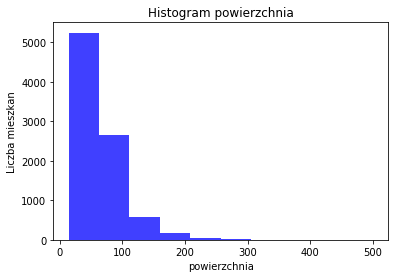

In [118]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['powierzchnia'],facecolor='b', alpha=0.75)



plt.xlabel('powierzchnia')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram powierzchnia')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

(array([1088., 5172., 1838.,  442.,   82.,   31.,   25.,   14.,   18.,
           9.]),
 array([ 4045. ,  8540.4, 13035.8, 17531.2, 22026.6, 26522. , 31017.4,
        35512.8, 40008.2, 44503.6, 48999. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'cena/mkw')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram cena/mkw')

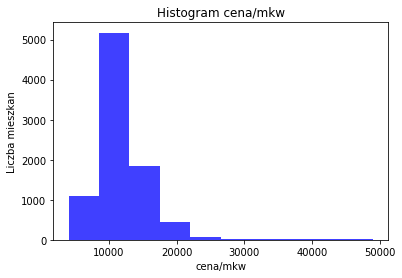

In [119]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['cena_metr_kw'],facecolor='b', alpha=0.75)



plt.xlabel('cena/mkw')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram cena/mkw')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

(array([8.037e+03, 5.190e+02, 9.600e+01, 3.400e+01, 2.100e+01, 5.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  139000.,  1531340.,  2923680.,  4316020.,  5708360.,  7100700.,
         8493040.,  9885380., 11277720., 12670060., 14062400.]),
 <a list of 10 Patch objects>)

Text(0.5,0,'cena')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram cena')

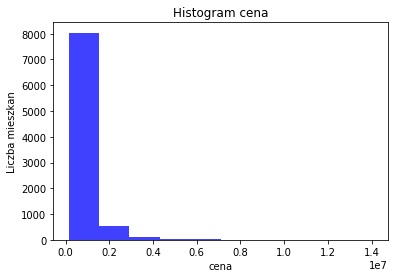

In [120]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['cena'],facecolor='b', alpha=0.75)



plt.xlabel('cena')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram cena')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

(array([  24.,  846., 3119.,    0., 3115., 1178.,    0.,  329.,   85.,
          23.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'pokoje')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram pokoje')

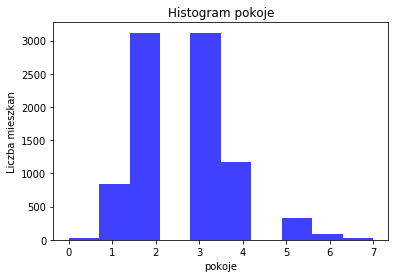

In [121]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['pokoje'],facecolor='b', alpha=0.75)



plt.xlabel('pokoje')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram pokoje')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

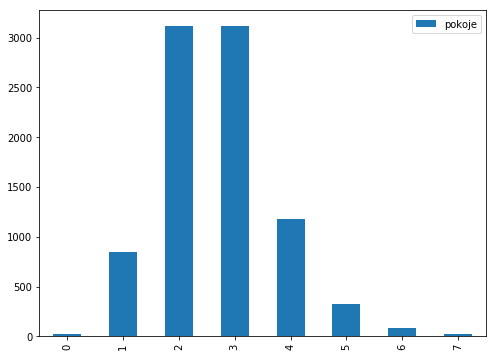

In [122]:
#wykres do tego fajnie by zrobic
df['pokoje'].value_counts().sort_index().plot.bar(figsize=(8, 6),legend=True)


In [123]:
df.powierzchnia.max()



pd.cut(df.powierzchnia, bins=(0, 38, 60, 90, 1000)).value_counts()

500

(38, 60]      3538
(60, 90]      2339
(0, 38]       1447
(90, 1000]    1395
Name: powierzchnia, dtype: int64

Text(0.5,0,'pokoje')

Text(0,0.5,'cena')

Text(0.5,1,'pokoje/cena')

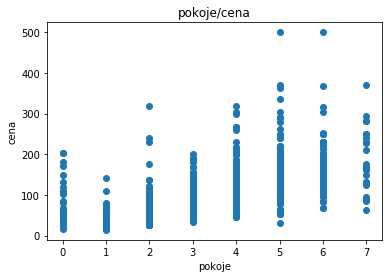

In [124]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.scatter(df['pokoje'],df.powierzchnia)



plt.xlabel('pokoje')
plt.ylabel('cena')
plt.title('pokoje/cena')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

Text(0.5,0,'pokoje')

Text(0,0.5,'cena')

Text(0.5,1,'pokoje/cena')

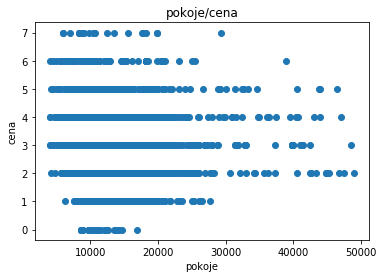

In [125]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.scatter(df['cena_metr_kw'],df['pokoje'])



plt.xlabel('pokoje')
plt.ylabel('cena')
plt.title('pokoje/cena')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

In [126]:
import seaborn as sns


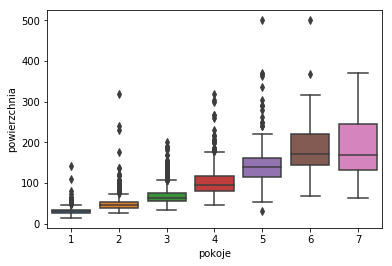

In [127]:
sns.boxplot(x="pokoje", y="powierzchnia", data=df[df.pokoje>0])

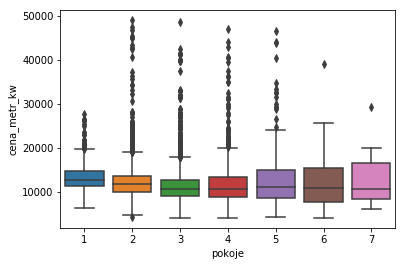

In [128]:
sns.boxplot(x="pokoje", y="cena_metr_kw", data=df[df.pokoje>0])

In [129]:
#widac, ze wraz ze wzrostem liczby pokoi średnia cena za mkw spada

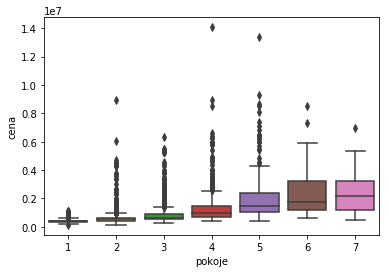

In [130]:
sns.boxplot(x="pokoje", y="cena", data=df[df.pokoje>0])

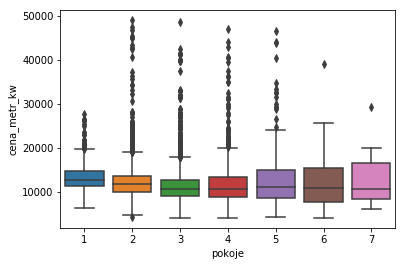

In [131]:
sns.boxplot(x="pokoje", y="cena_metr_kw", data=df[df.pokoje>0])

### cena przy wiekszej liczbie pokoi rosnie, ale cena za metr kwadratowy przy wiekszej liczbie pokoi juz niekoniecznie

In [132]:
#df.groupby('lokalizacja').mean()
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].median().sort_values(by='cena_metr_kw',ascending=False).reset_index(),2)

,dzielnica,cena,cena_metr_kw
0,Stare Miasto,1307500.0,19582.0
1,Nowe Miasto,699000.0,16583.0
2,Śródmieście,882500.0,15511.0
3,Mariensztat,990000.0,15468.0
4,Powązki,519000.0,15377.0
...,...,...,...
84,Międzylesie,570000.0,7125.0
85,Stara Miłosna,580000.0,6840.0
86,Kępa Tarchomińska,1250000.0,6830.0
87,Augustów,380819.0,6591.0


In [133]:
#df.groupby('lokalizacja').mean()
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].mean().sort_values(by='cena_metr_kw',ascending=False),2)

,cena,cena_metr_kw
dzielnica,,
Stare Miasto,1399666.61,19729.56
Śródmieście,1368001.25,17470.16
Nowe Miasto,765666.67,17089.00
Powiśle,1133806.38,15866.23
Mariensztat,990000.00,15468.00
...,...,...
Radość,697000.00,7576.00
Międzylesie,570000.00,7125.00
Kępa Tarchomińska,1250000.00,6830.00


In [134]:
df.groupby('dzielnica')[['cena','cena_metr_kw']].median()

,cena,cena_metr_kw
dzielnica,,
Anin,835000.0,8532.0
Augustów,380819.0,6591.0
Bemowo,595000.0,9900.0
Białołęka,445000.0,8050.0
Bielany,549000.0,10555.0
...,...,...
Zawady,861135.0,9000.0
mazowieckie,506100.0,10608.0
Śródmieście,882500.0,15511.0


Text(0.5,0,'pokoje')

Text(0,0.5,'cena')

Text(0.5,1,'pokoje/cena')

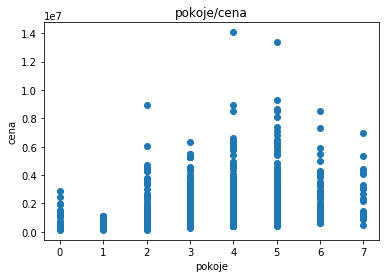

In [135]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.scatter(df['pokoje'],df['cena'])



plt.xlabel('pokoje')
plt.ylabel('cena')
plt.title('pokoje/cena')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

In [136]:
pd.options.display.max_rows = 999

In [137]:
df.dzielnica.value_counts()

Mokotów                1306
Śródmieście            1026
Wola                    821
Praga-Południe          609
Białołęka               541
Ursynów                 458
Bemowo                  443
Ochota                  385
Bielany                 371
mazowieckie             370
Wilanów                 338
Targówek                296
Ursus                   268
Żoliborz                245
Praga-Północ            230
Włochy                  185
Wawer                   148
Rembertów                52
Powiśle                  47
Gocław                   42
Górny Mokotów            39
Wesoła                   34
Bródno                   34
Sadyba                   29
Tarchomin                25
Saska Kępa               24
Grochów                  22
Stegny                   20
Stare Miasto             18
Dolny Mokotów            16
Służewiec                16
Kabaty                   16
Szczęśliwice             15
Skorosze                 15
Zawady                   15
Młynów              

In [138]:
# mazowieckie damy, że to jest "INNE"

In [139]:
#Prawilna lista dzielnic https://pl.wikipedia.org/wiki/Podzia%C5%82_administracyjny_Warszawy
 
#     Bemowo
#     Białołęka
#     Bielany
#     Mokotów
#     Ochota
#     Praga Południe
#     Praga Północ
#     Rembertów
#     Śródmieście
#     Targówek
#     Ursus
#     Ursynów
#     Wawer
#     Wesoła
#     Wilanów
#     Włochy
#     Wola
#     Żoliborz


In [140]:
df.dzielnica.replace('WILANÓW','Wilanów',inplace=True)

### Przypisanie dzielnic 

In [141]:
# Źródłow https://pl.wikipedia.org/wiki/Mokot%C3%B3w i drugie jeszcze dodatam xD
df.dzielnica.replace(['Stary Mokotów','Sielce','Czerniaków','Siekierki','Augustówka','Sadyba','Stegny','Wierzbno','Ksawerów','Służew','Służewiec','Wyględów','Górny Mokotów','Dolny Mokotów','Królikarnia'],'Mokotów',inplace=True)

In [142]:
#https://pl.wikipedia.org/wiki/%C5%9Ar%C3%B3dmie%C5%9Bcie_(Warszawa)

In [143]:
df.dzielnica.replace(['Powiśle','Stare Miasto','Muranów','Centrum','Nowe Miasto','Mariensztat','Latawiec'],'Śródmieście',inplace=True)

In [144]:
#https://pl.wikipedia.org/wiki/Miejski_System_Informacji_(Warszawa)

In [145]:
df.dzielnica.replace(['Grochów','Gocław','Gocławek','Olszynka Grochowska','Saska Kępa','Kamionek'],'Praga-Południe',inplace=True)

In [146]:
df.dzielnica.replace(['Elsnerów','Bródno','Zacisze','Utrata'],'Targówek',inplace=True)

In [147]:
df.dzielnica.replace(['Młociny','Marymont','Słodowiec','Wawrzyszew','Wrzeciono','Chomiczówka','Piaski'],'Bielany',inplace=True)

In [148]:
df.dzielnica.replace(['Choszczówka','Grodzisk','Nowodwory','Tarchomin','Żerań','Białołęka Dworska','Lewandów','Dąbrówka Szlachecka','Augustów','Kępa Tarchomińska'],'Białołęka',inplace=True)

In [149]:
df.dzielnica.replace(['Chrzanów','Górce','Jelonki','Groty','Fort Bema','Nowe Górce','Karolin'],'Bemowo',inplace=True)

In [150]:
df.dzielnica.replace(['Czyste','Koło','Młynów','Mirów','Nowolipki','Odolany','Powązki','Ulrychów'],'Wola',inplace=True)

In [151]:
df.dzielnica.replace(['Filtry','Rakowiec','Szczęśliwice','Stara Ochota'],'Ochota',inplace=True)

In [152]:
df.dzielnica.replace(['Nowe Włochy','Okęcie','Paluch','Raków'],'Włochy',inplace=True)

In [153]:
df.dzielnica.replace(['Kabaty','Grabów','Natolin','Imielin','Wyczółki'],'Ursynów',inplace=True)

In [154]:
df.dzielnica.replace(['Czechowice','Gołąbki','Niedźwiadek','Skorosze','Szamoty'],'Ursus',inplace=True)

In [155]:
df.dzielnica.replace(['Powsinek','Zawady','Kępa Zawadowska','Powsin'],'Wilanów',inplace=True)

In [156]:
df.dzielnica.replace(['Aleksandrów','Anin','Falenica','Las','Miedzeszyn','Międzylesie','Marysin Wawerski','Radość','Zerzeń','Zbytki','Borków','Sadul'],'Wawer',inplace=True)

In [157]:
df.dzielnica.replace(['Szmulki','Szmulowizna','Praga','Pelcowizna'],'Praga-Północ',inplace=True)

In [158]:
df.dzielnica.replace(['Nowy Rembertów','Stary Rembertów','Kawęczyn-Wygoda'],'Rembertów',inplace=True)

In [159]:
df.dzielnica.replace(['Stara Miłosna','Wola Grzybowska'],'Wesoła',inplace=True)

In [160]:
df.dzielnica.replace(['Cytadela'],'Żoliborz',inplace=True)

In [161]:
df.dzielnica.replace(['mazowieckie'],'brak informacji',inplace=True)

In [162]:
df.dzielnica.value_counts()

Mokotów            1448
Śródmieście        1095
Wola                869
Praga-Południe      713
Białołęka           581
Ursynów             491
Bemowo              458
Ochota              408
Bielany             387
brak informacji     370
Wilanów             358
Targówek            334
Ursus               285
Żoliborz            246
Praga-Północ        239
Włochy              188
Wawer               160
Rembertów            52
Wesoła               37
Name: dzielnica, dtype: int64

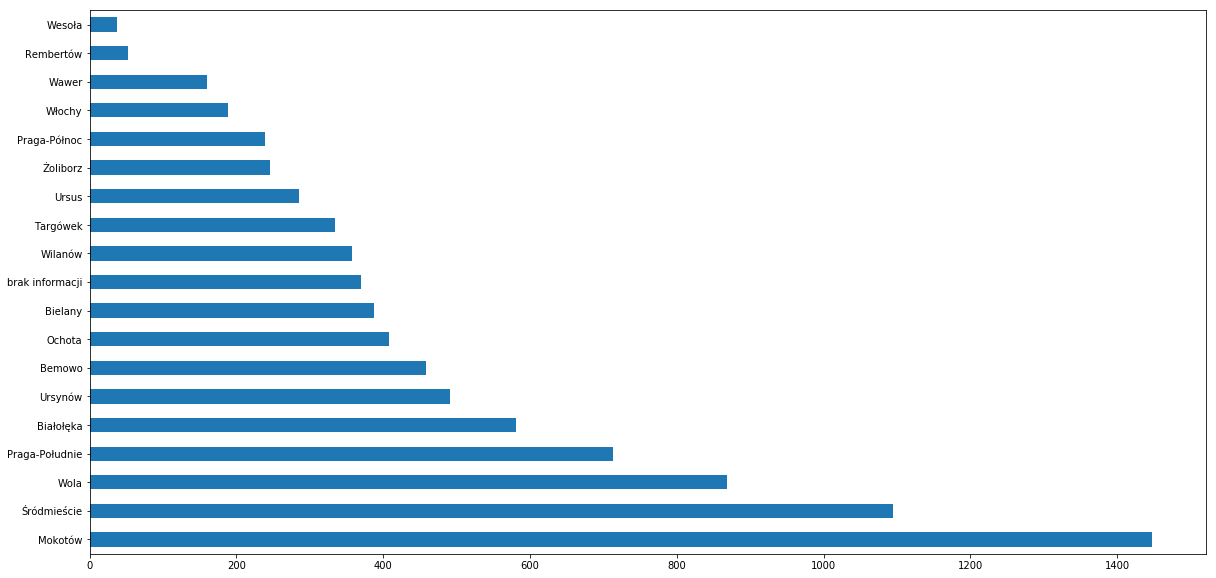

In [163]:
df['dzielnica'].value_counts().plot(kind='barh',figsize=(20,10))

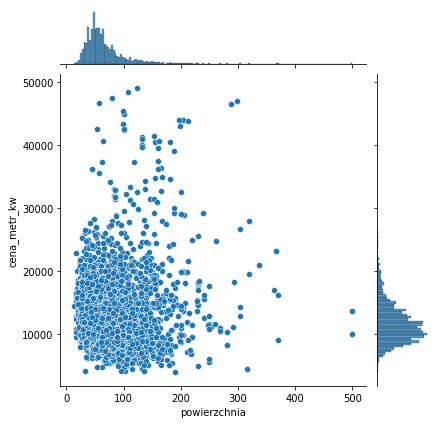

In [164]:
#To sie liczy kilkanasie minut i nic z tego nie ma
sns.jointplot(x="powierzchnia", y="cena_metr_kw", data=df[df.pokoje>0])


 


2020-10-18 16:45:02 [py.warnings] WARNING: C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.



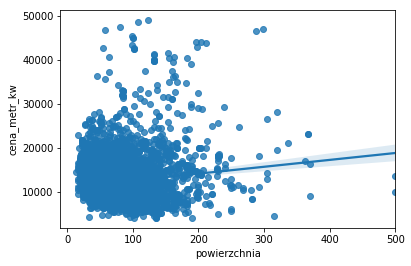

In [165]:
import pandas.util.testing as tm

# use the function regplot to make a scatterplot
sns.regplot(x="powierzchnia", y="cena_metr_kw", data=df[df.pokoje>0])
#sns.plt.show()

In [166]:

from plotnine import *
#to nizej to bardzo duze ograniczenie na cene dalem

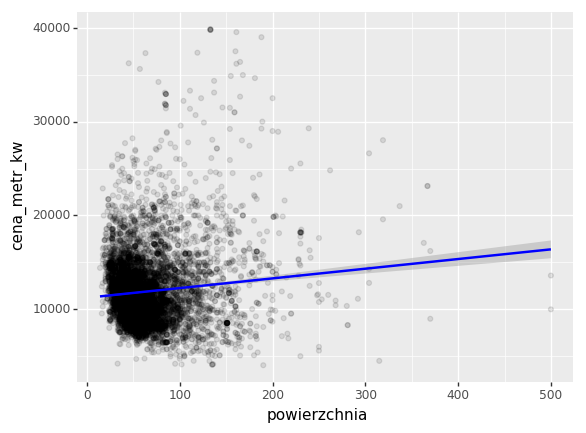

<ggplot: (-9223371911371916207)>

In [167]:
(
    ggplot(df[(df.pokoje>0)&(df.cena_metr_kw<40000)], aes(x='powierzchnia', y='cena_metr_kw'))
    + geom_point(alpha=0.1)
    + geom_smooth(color='blue')
    + xlab('powierzchnia')
    + ylab('cena_metr_kw')
)

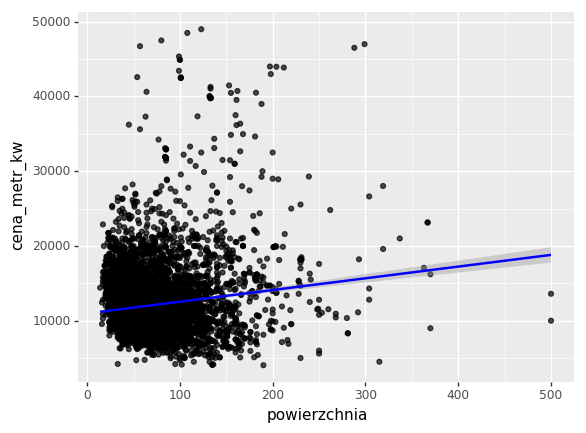

<ggplot: (-9223371911371579588)>

In [168]:
(
    ggplot(df[df.pokoje>0], aes(x='powierzchnia', y='cena_metr_kw'))
    + geom_point(alpha=0.7)
    + geom_smooth(color='blue')
#     + coord_fix(ylim=(10, 20))
    + xlab('powierzchnia') 
    + ylab('cena_metr_kw')
)

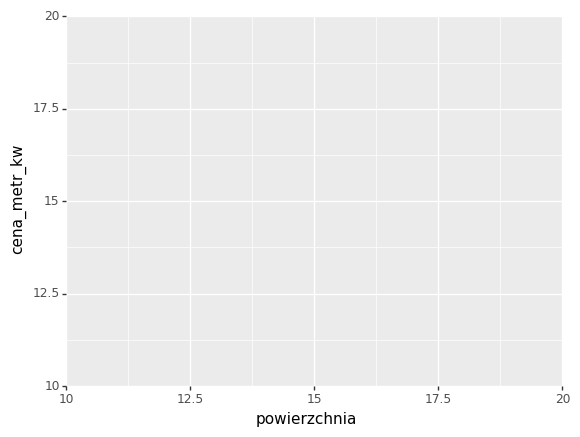

<ggplot: (-9223371911371579462)>

In [169]:
(
    ggplot(df[df.pokoje>0], aes(x='powierzchnia', y='cena_metr_kw'))
    + coord_cartesian(xlim=(10, 20),ylim=(10000,20000),expand=False)
    + geom_point(alpha=0.7)
    + geom_smooth(color='blue')

)

In [170]:
df.columns

Index(['numer_ogloszenia', 'tytul', 'cena', 'cena_za_metr', 'lokalizacja',
       'atrybuty', 'wartosci', 'opis', 'pietro', 'powierzchnia', 'pokoje',
       'oplaty', 'pietra_w_bud', 'typ_zab', 'rok_budowy', 'material',
       'cena_metr_kw', 'dzielnica'],
      dtype='object')

In [171]:
df.cena_metr_kw.mean()

12006.72829452919

<Figure size 1440x864 with 0 Axes>

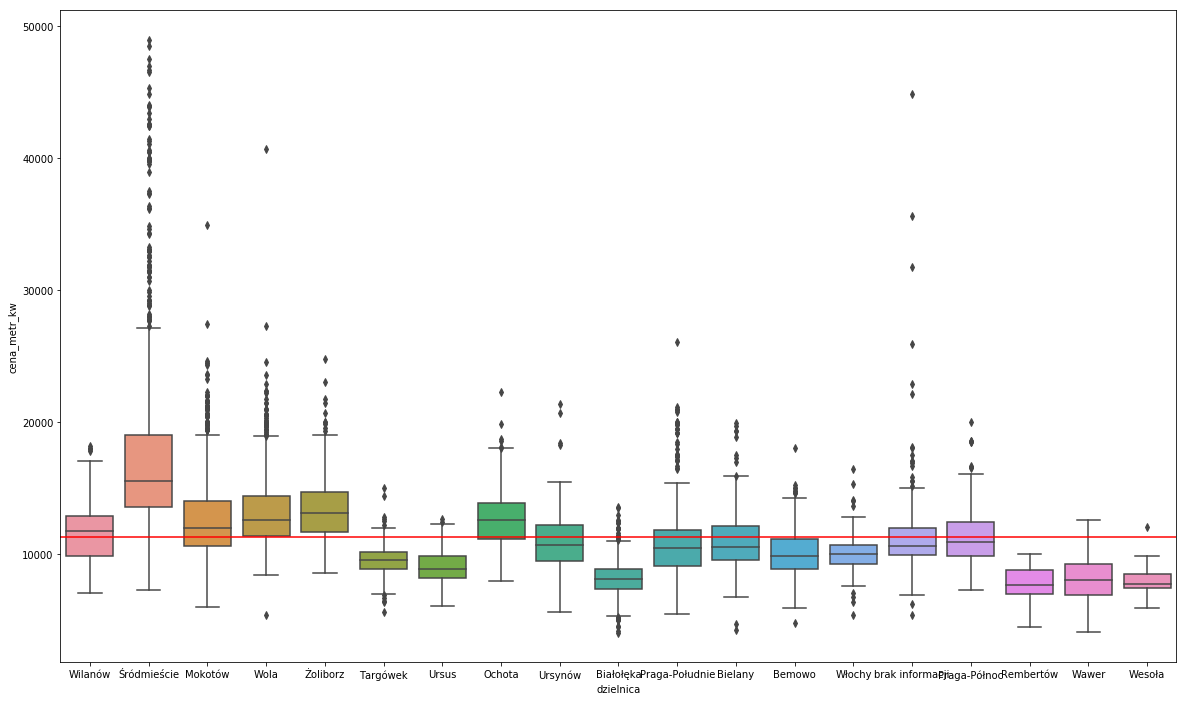

In [172]:
plt.figure(figsize=(20,12))
sns.boxplot(x="dzielnica", y="cena_metr_kw", data=df[df.pokoje>0])
plt.axhline(y=df.cena_metr_kw.median(),color='r')#srednia dla całego miasta

In [173]:
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].median().sort_values(by='cena_metr_kw',ascending=False).reset_index(),2)

,dzielnica,cena,cena_metr_kw
0,Śródmieście,890000.0,15531.0
1,Żoliborz,795000.0,13160.5
2,Ochota,650000.0,12599.5
3,Wola,629000.0,12586.0
4,Mokotów,699539.0,11988.5
5,Wilanów,857500.0,11729.0
6,Praga-Północ,544000.0,10900.0
7,Ursynów,670000.0,10694.0
8,brak informacji,506100.0,10608.0
9,Bielany,549000.0,10540.0


In [174]:
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].mean().sort_values(by='cena_metr_kw',ascending=False).reset_index(),2)

,dzielnica,cena,cena_metr_kw
0,Śródmieście,1356474.14,17435.59
1,Żoliborz,990277.85,13443.56
2,Wola,768605.95,13248.83
3,Mokotów,980824.67,12626.09
4,Ochota,804260.62,12619.31
5,Wilanów,1039266.18,11593.55
6,brak informacji,596664.77,11302.97
7,Praga-Północ,625379.15,11276.72
8,Bielany,626242.25,11065.84
9,Ursynów,749228.76,10854.06


In [175]:
df[df.dzielnica=='Mokotów']

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw,dzielnica
2,18521281,"Racławicka, 4-pokoje, 113m2",1350000,"11 946,90 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[113 m, 4, 4, własność, do remontu, 1979, blok, cegła, 6, 1, tak, gratka-815/6110/OMS]",Powierzchnia w m2 113 m Liczba pokoi 4 Piętro 4 Forma własności własność Stan do remontu Rok budowy 1979 Typ zabudowy blok Materiał budynku cegła Liczba pięter w budynku 6 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-815/6110/OMS,4,113,4,NaN,6,blok,1979,cegła,11946,Mokotów
10,18483261,"Stary Mokotów - 4 pokojowe, 62 m2",690000,"11 184,96 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Materiał budynku, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[61,69 m, 4, 1, własność, do remontu, 1975, rama H, 4, tak, gratka-3756/4790/OMS]","Powierzchnia w m2 61,69 m Liczba pokoi 4 Piętro 1 Forma własności własność Stan do remontu Rok budowy 1975 Materiał budynku rama H Liczba pięter w budynku 4 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-3756/4790/OMS",1,61,4,NaN,4,NaN,1975,rama,11184,Mokotów
13,18496167,3/4 pokojowe_funkcjonalne_świetna infrastruktura,600000,9 375 zł/m,"[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[64 m, 4, 3, spółdzielcze własnościowe, dobry, 1971, blok, 4, tak, gratka-1265/4043/OMS]",Powierzchnia w m2 64 m Liczba pokoi 4 Piętro 3 Forma własności spółdzielcze własnościowe Stan dobry Rok budowy 1971 Typ zabudowy blok Liczba pięter w budynku 4 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-1265/4043/OMS,3,64,4,NaN,4,blok,1971,NaN,9375,Mokotów
19,18385235,"Mieszkanie, sprzedaż, 61.37, Warszawa, Mokotów",732323,"11 932,92 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Dostępność od, Numer referencyjny]","[61,37 m, 2, 3, 2013, 7, 2020-09-02, gratka-310384]","Powierzchnia w m2 61,37 m Liczba pokoi 2 Piętro 3 Rok budowy 2013 Liczba pięter w budynku 7 Dostępność od 2020-09-02 Numer referencyjny gratka-310384",3,61,2,NaN,7,NaN,2013,NaN,11932,Mokotów
20,18386879,"Mieszkanie, sprzedaż, 59.00, Warszawa, Mokotów",595000,"10 084,75 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Dostępność od, Numer referencyjny]","[59 m, 3, 9, blok, rama H, 9, 2020-10-31, gratka-894029]",Powierzchnia w m2 59 m Liczba pokoi 3 Piętro 9 Typ zabudowy blok Materiał budynku rama H Liczba pięter w budynku 9 Dostępność od 2020-10-31 Numer referencyjny gratka-894029,9,59,3,NaN,9,blok,NaN,rama,10084,Mokotów
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8716,18250789,"Mieszkanie Warszawa Mokotów, ul. Bukowińska",607000,"10 982,45 zł/m","[Warszawa, Mokotów, mazowieckie]","[Opłaty (czynsz administracyjny, media), Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Numer referencyjny, Komunikacja, Zdrowie i uroda, Edukacja, Pozostałe]","[400 zł, 55,27 m, 3, 10, własność, 1969, blok, 10, gratka-DH321126, apteka, sklep]","Opłaty (czynsz administracyjny, media) 400 zł Powierzchnia w m2 55,27 m Liczba pokoi 3 Piętro 10 Forma własności własność Rok budowy 1969 Typ zabudowy blok Liczba pięter w budynku 10 Numer referencyjny gratka-DH321126 Komunikacja apteka Zdrowie i uroda sklep Edukacja Pozostałe",1,55,3,,10,blok,1969,NaN,10982,Mok

<Figure size 1440x864 with 0 Axes>

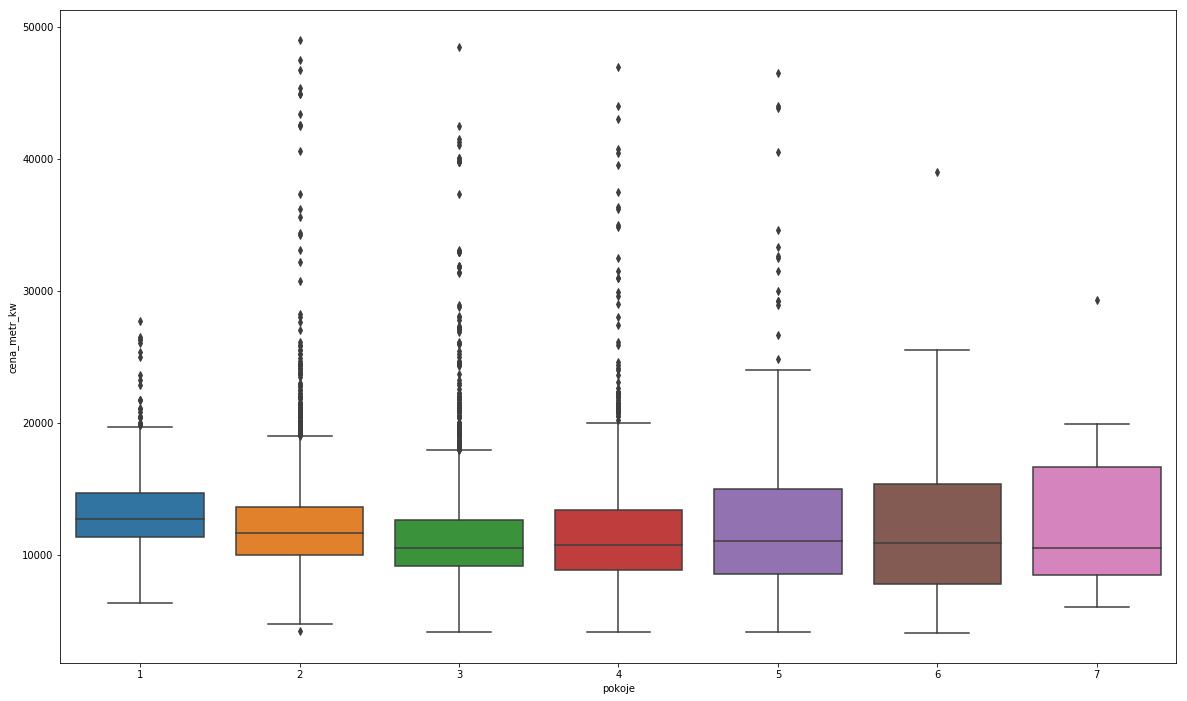

In [176]:
plt.figure(figsize=(20,12))
sns.boxplot(x="pokoje", y="cena_metr_kw", data=df[df.pokoje>0])

In [177]:
# df.groupby([(pd.cut(df['powierzchnia'], bins=bins),'dzielnica').powierzchnia.count()

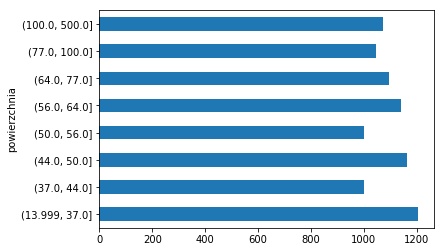

In [178]:
#bins = [0, 35, 45,55, 65,75,90,120, 1000]
df_to_plot = df.groupby(pd.qcut(df['powierzchnia'], q=8)).powierzchnia.count()
df_to_plot.plot(kind='barh')

In [179]:
df['powierzchnia_bins']=pd.qcut(df['powierzchnia'], q=8)

In [180]:
df.columns

Index(['numer_ogloszenia', 'tytul', 'cena', 'cena_za_metr', 'lokalizacja',
       'atrybuty', 'wartosci', 'opis', 'pietro', 'powierzchnia', 'pokoje',
       'oplaty', 'pietra_w_bud', 'typ_zab', 'rok_budowy', 'material',
       'cena_metr_kw', 'dzielnica', 'powierzchnia_bins'],
      dtype='object')

In [181]:
def count_below_mean(dataframe_series):
    sum(i > np.mean(dataframe_series) for i in dataframe_series)
    return dataframe_series

In [182]:
round(df.groupby(['dzielnica','powierzchnia_bins']).agg({'cena_metr_kw':['median','mean'],'cena':['median','mean','count']}),2)

cena_metr_kw                 cena  \
                                        median      mean     median   
dzielnica       powierzchnia_bins                                     
Bemowo          (13.999, 37.0]         12166.0  11991.27   392000.0   
                (37.0, 44.0]           10987.0  10983.38   469500.0   
                (44.0, 50.0]           10315.0  10254.92   485000.0   
                (50.0, 56.0]            9839.5  10043.03   544033.0   
                (56.0, 64.0]            9918.0   9966.37   600000.0   
                (64.0, 77.0]            9527.0   9881.00   682500.0   
                (77.0, 100.0]           9487.0   9533.14   779000.0   
                (100.0, 500.0]          7388.0   8424.30   914000.0   
Białołęka       (13.999, 37.0]          8926.0   9232.68   307000.0   
                (37.0, 44.0]            8250.0   8661.51   350000.0   
                (44.0, 50.0]            8351.0   8435.64   398500.0   
                (50.0, 56.0]            7964.0   7960.66   419500.0   
                (56.0, 64.0]            8079.5   8226.60   484388.5   
                (64.0, 77.0]            8225.0   8219.85   589000.0   
                (77.0, 100.0]           7548.0   7223.36   619014.0   
                (100.0, 500.0]          6509.0   6456.90   790000.0   
Bielany         (13.999, 37.0]         12409.0  12903.95   399000.0   
                (37.0, 44.0]           10986.5  11383.96   427500.0   
                (44.0, 50.0]           10312.0  10988.49   495000.0   
                (50.0, 56.0]           10271.0  10476.00   550000.0   
                (56.0, 64.0]           10025.5   9947.60   609500.0   
                (64.0, 77.0]           10466.0  10499.78   741200.0   
                (77.0, 100.0]          10197.5  10955.68   914500.0   
                (100.0, 500.0]         10188.0  10854.48  1350000.0   
Mokotów         (13.999, 37.0]         12828.0  13130.32   400000.0   
                (37.0, 44.0]           12075.0  12336.52   499000.0   
                (44.0, 50.0]           11346.0  11655.37   542500.0   
                (50.0, 56.0]           11519.0  11736.85   617000.0   
                (56.0, 64.0]           11149.5  11708.59   675000.0   
                (64.0, 77.0]           12160.5  12273.18   847000.0   
                (77.0, 100.0]          13125.0  13322.93  1100000.0   
                (100.0, 500.0]         13895.5  13780.35  1750000.0   
Ochota          (13.999, 37.0]         12824.0  13380.48   419000.0   
                (37.0, 44.0]           12207.0  12486.31   492000.0   
                (44.0, 50.0]           11555.0  12257.96   549900.0   
                (50.0, 56.0]           11132.5  11897.53   609500.0   
                (56.0, 64.0]           11824.5  12274.98   712500.0   
                (64.0, 77.0]           13180.0  12407.09   940000.0   
                (77.0, 100.0]          12968.5  12474.48  1065000.0   
                (100.0, 500.0]         13250.0  12856.53  1570000.0   
Praga-Południe  (13.999, 37.0]         11624.5  11735.07   361500.0   
                (37.0, 44.0]           11239.5  11152.06   447000.0   
                (44.0, 50.0]           10190.0  10510.15   478000.0   
                (50.0, 56.0]            9933.0  10512.03   544500.0   
                (56.0, 64.0]            9436.5   9985.41   575500.0   
                (64.0, 77.0]           10014.0  10418.89   738000.0   
                (77.0, 100.0]          10154.0  10799.92   865000.0   
                (100.0, 500.0]         11170.0  11823.85  1268500.0   
Praga-Północ    (13.999, 37.0]         13125.0  12847.87   360000.0   
                (37.0, 44.0]           10847.5  11312.44   448000.0   
                (44.0, 50.0]           10440.0  10474.20   483525.0   
                (50.0, 56.0]           10115.0  10247.28   550000.0   
                (56.0, 64.0]           10566.0  10535.50   633910.0   
                (64.0, 77.0]           10837.5  11007.82  

In [183]:
#generalnie wszystko ponizej srednie powinno juz byc dobrą inwestycją

In [184]:
df[(df['powierzchnia_bins'].astype(str) == str(pd.Interval(left=56.0, right=63.0))) & (df['dzielnica']=='Wola')& (df['cena_metr_kw']<10482)]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw,dzielnica,powierzchnia_bins


<Figure size 1440x864 with 0 Axes>

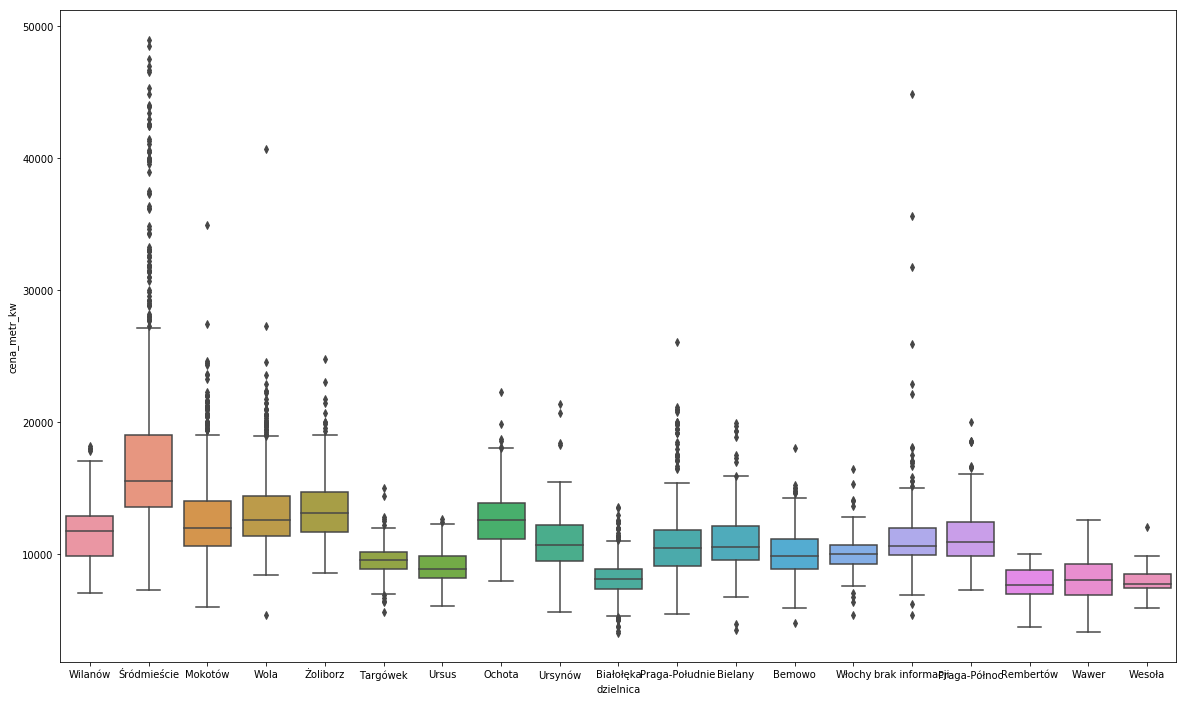

In [185]:
plt.figure(figsize=(20,12))
sns.boxplot(x="dzielnica", y="cena_metr_kw", data=df[df.pokoje>0])

In [186]:
df

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw,dzielnica,powierzchnia_bins
0,18341609,Wyjątkowy apartament z tarasem i pięknym widokiem,2850000,"15 745,86 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Dostępność od, Numer referencyjny]","[181 m, 4, 2, 2002, 2, 2020-05-25, gratka-340882324]",Powierzchnia w m2 181 m Liczba pokoi 4 Piętro 2 Rok budowy 2002 Liczba pięter w budynku 2 Dostępność od 2020-05-25 Numer referencyjny gratka-340882324,2,181,4,NaN,2,NaN,2002,NaN,15745,Wilanów,"(100.0, 500.0]"
1,18537045,29m2 | Solec | Łazienki Królewskie 900m | Widok na,450000,"15 469,23 zł/m","[Warszawa, Śródmieście, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[29,09 m, 1, 5, spółdzielcze własnościowe z KW, wysoki standard, 1969, blok, płyta, 10, 1, tak, gratka-309/9140/OMS]","Powierzchnia w m2 29,09 m Liczba pokoi 1 Piętro 5 Forma własności spółdzielcze własnościowe z KW Stan wysoki standard Rok budowy 1969 Typ zabudowy blok Materiał budynku płyta Liczba pięter w budynku 10 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-309/9140/OMS",5,29,1,NaN,10,blok,1969,płyta,15469,Śródmieście,"(13.999, 37.0]"
2,18521281,"Racławicka, 4-pokoje, 113m2",1350000,"11 946,90 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[113 m, 4, 4, własność, do remontu, 1979, blok, cegła, 6, 1, tak, gratka-815/6110/OMS]",Powierzchnia w m2 113 m Liczba pokoi 4 Piętro 4 Forma własności własność Stan do remontu Rok budowy 1979 Typ zabudowy blok Materiał budynku cegła Liczba pięter w budynku 6 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-815/6110/OMS,4,113,4,NaN,6,blok,1979,cegła,11946,Mokotów,"(100.0, 500.0]"
3,18332131,KOMFORTOWY APARTAMENT NA SPRZEDAŻ WILANÓW SARMACKA,1800000,"11 729,44 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Dostępność od, Numer referencyjny]","[153,46 m, 4, 3, 2008, 4, 2020-01-15, gratka-469389]","Powierzchnia w m2 153,46 m Liczba pokoi 4 Piętro 3 Rok budowy 2008 Liczba pięter w budynku 4 Dostępność od 2020-01-15 Numer referencyjny gratka-469389",3,153,4,NaN,4,NaN,2008,NaN,11729,Wilanów,"(100.0, 500.0]"
4,18331409,Przy Pałacu z ogódkiem Cisza Spokój,2800000,"13 725,49 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[204 m, 4, parter, 2009, 2, gratka-610569777]",Powierzchnia w m2 204 m Liczba pokoi 4 Piętro parter Rok budowy 2009 Liczba pięter w budynku 2 Numer referencyjny gratka-610569777,NaN,204,4,NaN,2,NaN,2009,NaN,13725,Wilanów,"(100.0, 500.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,18246239,"Mieszkanie Warszawa Mokotów, ul. Wita Stwosza",560000,"12 727,27 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[44 m, 2, 5, własność, 1978, 15, w garażu, w aneksie, gratka-19384/6624/OMS]",Powierzchnia w m2 44 m Liczba pokoi 2 Piętro 5 Forma własności własność Rok budowy 1978 Liczba pięter w budynku 15 Miejsce parkingowe w garażu Forma kuchni w aneksie Numer referencyjny gratka-19384/6624/OMS,5,44,2,NaN,15,NaN,1978,NaN,12727,Mokotów,"(37.0, 44.0]"
8730,18246229,"Mieszkanie Warszawa Mokotów, ul. Marsylska",370000,"11 935,48 zł/m","[Warszawa, Mok

In [187]:
df.groupby(['dzielnica','pokoje']).agg({'cena_metr_kw':['median','mean','min', 'max']})

cena_metr_kw                            
                             median          mean    min    max
dzielnica       pokoje                                         
Bemowo          1           12379.0  11608.416667   8400  14263
                2           10666.0  10608.353383   4758  13170
                3            9630.0   9868.886700   6826  15000
                4            9408.0   9212.907692   5904  15219
                5            8009.0   9026.705882   7000  18019
                6            9381.0   9395.000000   8933   9871
                7            6000.0   6000.000000   6000   6000
Białołęka       1            9303.0   9236.354839   7698  13486
                2            8299.5   8519.805310   5746  13548
                3            7857.0   7894.931915   4200  12598
                4            7929.0   7605.904110   5131   9035
                5            6538.0   6765.090909   5114   8664
                6            5027.0   5232.250000   4045   6830
                7            8387.0   8387.000000   8387   8387
Bielany         0            9559.0   9559.000000   8583  10535
                1           13000.0  13905.545455  10302  19966
                2           11065.0  11401.340580   4212  18888
                3           10136.5  10520.505952   4716  15904
                4           10099.5  10542.411765   7632  17276
                5            7305.0   8328.363636   6785  11526
                7           13596.0  13596.000000  13596  13596
Mokotów         0           11113.5  11327.000000   9934  13833
                1           12692.0  12980.979592   8947  20442
                2           12087.5  12586.115226   8641  24453
                3           11562.0  12354.389432   7879  24515
                4           11946.0  12960.942982   7192  34964
                5           12060.0  12743.161290   6886  22031
                6           16175.0  15194.600000   7412  20496
                7            9064.5  11406.500000   6024  18215
Ochota          0            9628.0  10842.333333   9000  13899
                1           13003.0  13730.538462  10714  18725
                2           12162.0  12519.070513   9400  17192
                3           11992.0  12056.880342   8421  17524
                4           13291.5  12955.346154   7990  22323
                5           12495.0  12107.384615   8578  18010
                7           14480.5  14480.500000   9075  19886
Praga-Południe  0            9811.0   9811.000000   9811   9811
                1           11649.5  11774.108108   8022  17058
                2           10584.5  10968.234848   7971  19867
                3            9784.0  10344.840304   6659  26097
                4           10274.5  10543.825000   7165  20919
                5            9381.5  11060.100000   6540  20952
                6           10014.0  10824.333333   5492  20790
                7           18759.5  18759.500000  17593  19926
Praga-Północ    0            8723.0   8723.000000   8723   8723
                1           13125.0  12848.657143   7932  20000
                2           11115.0  11408.362637   8422  16500
                3           10042.0  10294.309859   7254  16105
                4           10600.0  11584.882353   8168  18555
                5           11168.0  10840.833333   8282  11900
Rembertów       1            8802.0   8411.333333   6324   9238
                2            7598.0   7742.444444   6280   8630
                3            7614.0   7783.850000   5533  10000
                4            6887.5   6656.000000   5021   8058
                5            6509.0   6096.600000   4492   7481
Targówek        0           11521.0  11521.000000  11521  11521
                1           10710.0  10672.266667   9535  12200
                2            9473.0   9749.189189   6470  14983
                3            9042.0   9144.943262   6872  11111
                4            9693.0   9869.756098   667

In [188]:
round(df.groupby(['dzielnica',]).agg({'cena_metr_kw':['median','mean'],'cena':['median','mean'],'powierzchnia':['median','mean']}),2)

cena_metr_kw              cena             powierzchnia       
                      median      mean  median        mean       median   mean
dzielnica                                                                     
Bemowo                9883.0  10084.45  599000   628574.32         61.0  63.75
Białołęka             8088.0   8134.38  445000   480230.47         55.0  60.74
Bielany              10540.0  11065.84  549000   626242.25         50.0  57.35
Mokotów              11988.5  12626.09  699539   980824.67         60.0  75.42
Ochota               12599.5  12619.31  650000   804260.62         55.0  63.48
Praga-Południe       10449.0  10795.30  550000   646085.40         55.0  59.40
Praga-Północ         10900.0  11276.72  544000   625379.15         50.0  55.97
Rembertów             7649.0   7629.12  467000   470967.06         60.0  64.77
Targówek              9517.0   9538.82  475000   525012.81         53.0  55.90
Ursus                 8882.0   9098.16  470000   501961.07         50.0  56.16
Ursynów              10694.0  10854.06  670000   749228.76         65.0  71.41
Wawer                 8063.5   8067.88  544500   587809.23         71.0  77.59
Wesoła                7700.0   7945.62  545000   508654.32         62.0  65.08
Wilanów              11729.0  11593.55  857500  1039266.18         79.5  89.05
Wola                 12586.0  13248.83  629000   768605.95         49.0  58.11
Włochy                9994.0  10112.93  607250   675274.59         60.0  67.80
brak informacji      10608.0  11302.97  506100   596664.77         45.0  52.09
Śródmieście          15531.0  17435.59  890000  1356474.14         57.0  71.09
Żoliborz             13160.5  13443.56  795000   990277.85         62.0  70.96

In [189]:
import os
def remove_jl(name):
    if os.path.exists(name):
        os.remove(name)
    else:
        print("brak pliku o takiej nazwie")  

In [190]:



# remove_jl("quoteresult.jl")
# remove_jl("quoteresult.json")